Britton Lab - 06/09/2023 <br>

Early Polarization - Allan Deviation Plots


<font color='red'>Author: Evan McClintock

In [1]:
import numpy as np
#from numpy import linalg as la
import matplotlib.pyplot as plt
import pandas as pd
#from datetime import timedelta
import allantools #https://allantools.readthedocs.io/en/latest/functions.html
import os
#import scipy
#import copy
#import math
#import time
#import pypolar.jones as jones #https://pypolar.readthedocs.io/en/latest/05-Jones-Examples.html
#import pypolar.mueller as mueller
#import pypolar.visualization as vis
#import py_pol
#from py_pol.jones_vector import Jones_vector, degrees #https://py-pol.readthedocs.io/en/master/source/tutorial/Drawing_docs.html
#from py_pol.stokes import Stokes, create_Stokes, degrees
#import seaborn as sns
#import plotly.graph_objs as go   # For plotting 3D vectors
#from plotly.offline import iplot
#import warnings

In [5]:
import importlib
import data_manager.dataset
import data_manager.stationary
import data_manager.switch
import data_manager.plotting
import data_manager.pairs
importlib.reload(data_manager.dataset)
importlib.reload(data_manager.stationary)
importlib.reload(data_manager.switch)
importlib.reload(data_manager.plotting)
importlib.reload(data_manager.pairs)
from data_manager.dataset import Dataset
from data_manager.stationary import StationarySet
from data_manager.switch import SwitchSet
from data_manager.plotting import plot_rot_angle
from data_manager.pairs import IOPair

In [6]:
# plt.ioff() #https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ioff.html
# plt.close('all')
BOLD_ON = "\033[1m"
BOLD_OFF = "\033[0m"
LAB = "/mnt/c/Users/2020n/Documents/Career/Locations/Britton Lab/"
DATA = LAB + "QWDM_Project/H1_Datasets/"

In [7]:
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

/home/evanshaped/anaconda3/envs/britton2024envWSL/bin/python
3.12.2 | packaged by conda-forge | (main, Feb 16 2024, 20:50:58) [GCC 12.3.0]
sys.version_info(major=3, minor=12, micro=2, releaselevel='final', serial=0)


# Great Circle Metric

#### Testing

In [214]:
# TODO: ax.grid() for both plot parameters

In [31]:
filepath_temp='Datasets/Whole_setup/08-17/PAX_08-17_DC_Orth_1_1345.csv'
ds_temp = SwitchSet(filepath_temp,set_range=(0.05,0.15))

Time range: min=2439.848, max=7306.779


=== performing change point detection ===
cp range: (2500.0, 2600.0)
using 7169 data entries
skipping 4327 points
considering params: ['s1', 's2', 's3']

--- switch param: s1 ---
size of data we are using = (7169,)
computing range... ---> range = (0.17,0.23)
displaying jump_fig for switch parameter = s1



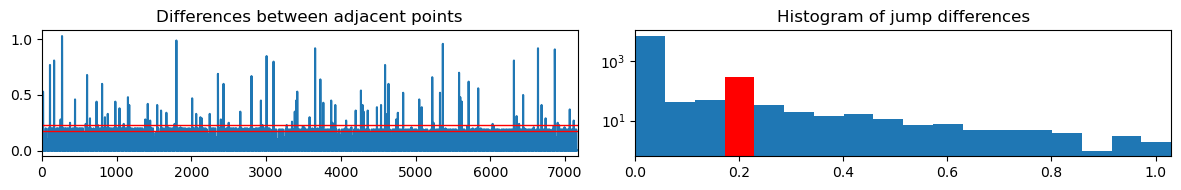



found width of 0.057 for s1
greater than prev width of -1.000 for None
--- end of switch param: s1 ---

--- switch param: s2 ---
size of data we are using = (7169,)
computing range... ---> range = (1.94,2.00)
displaying jump_fig for switch parameter = s2



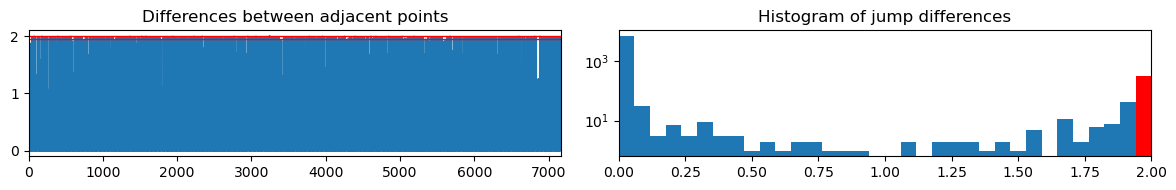



found width of 0.059 for s2
greater than prev width of 0.057 for s1
--- end of switch param: s2 ---

--- switch param: s3 ---
size of data we are using = (7169,)
computing range... ---> range = (0.09,0.15)
displaying jump_fig for switch parameter = s3



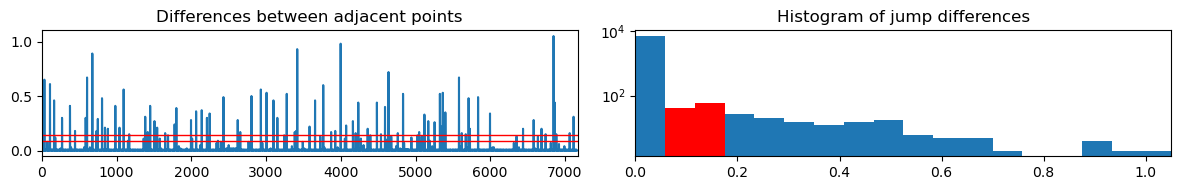



--- end of switch param: s3 ---

---> switch parameter found: s2 <---
finding differences within range = (1.94,2.00)
Jump points detected: 313
out of total: ~399.9

computing offset...


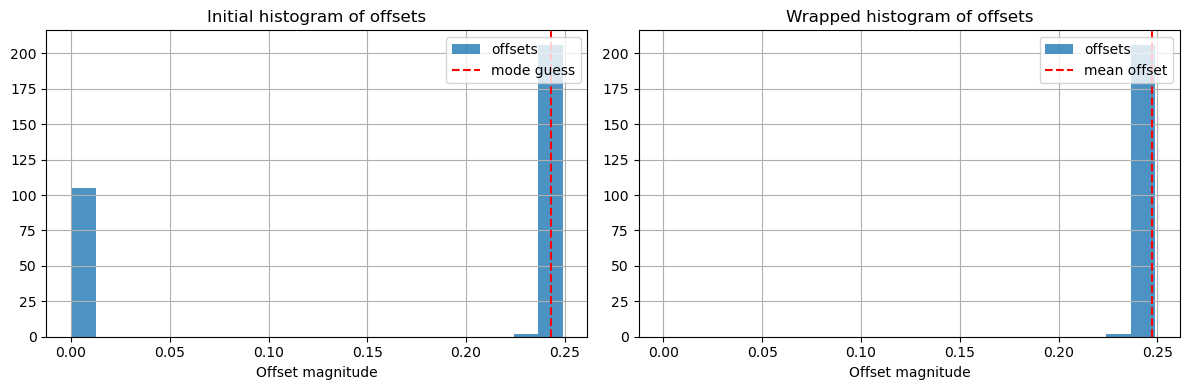



offset = 0.247 seconds
=== end change point detection ===
=== performing change point detection ===
cp range: (6000.0, 6100.0)
using 7184 data entries
skipping 254317 points
considering params: ['s1', 's2', 's3']

--- switch param: s1 ---
size of data we are using = (7184,)
computing range... ---> range = (0.17,0.23)
displaying jump_fig for switch parameter = s1



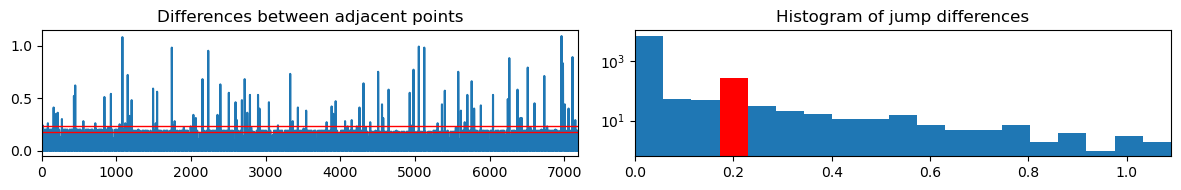



found width of 0.057 for s1
greater than prev width of -1.000 for None
--- end of switch param: s1 ---

--- switch param: s2 ---
size of data we are using = (7184,)
computing range... ---> range = (1.94,2.00)
displaying jump_fig for switch parameter = s2



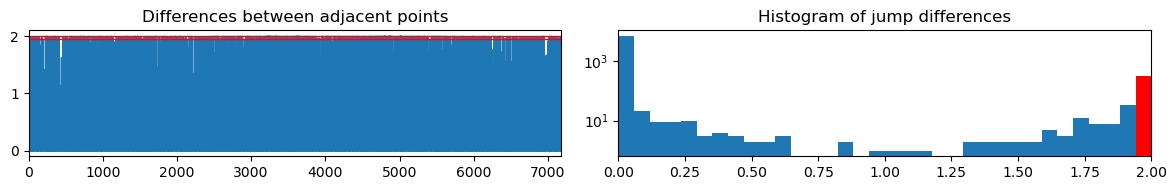



found width of 0.059 for s2
greater than prev width of 0.057 for s1
--- end of switch param: s2 ---

--- switch param: s3 ---
size of data we are using = (7184,)
computing range... ---> range = (0.09,0.15)
displaying jump_fig for switch parameter = s3



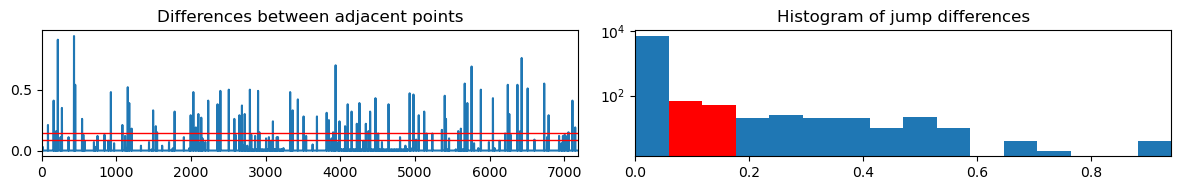



--- end of switch param: s3 ---

---> switch parameter found: s2 <---
finding differences within range = (1.94,2.00)
Jump points detected: 318
out of total: ~399.9

computing offset...


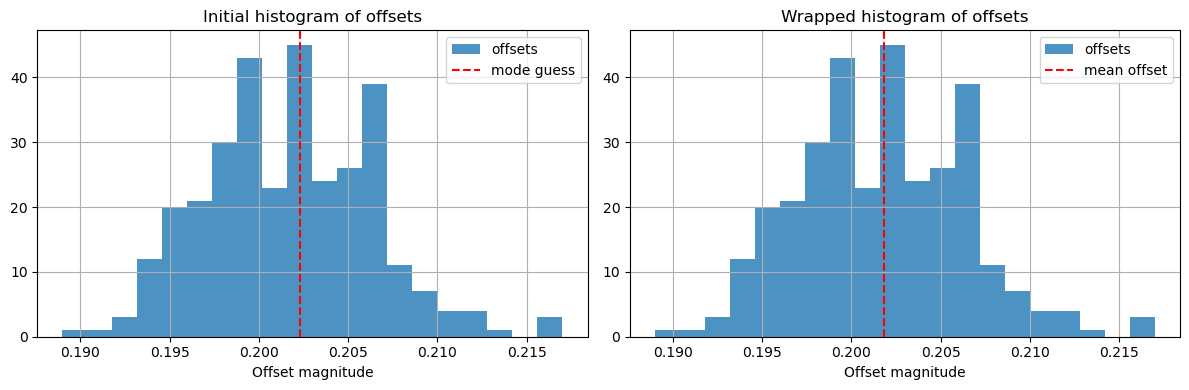



offset = 0.202 seconds
=== end change point detection ===
Nominal Switch Time = 0.2500000
Offset change of -0.045 seconds over 14000.0 switches
Corrected Switch Time = 0.2499968
=== starting average_data ===
averaging data... Done
Dropped 0 observations with <4 points (out of total 19467 observations)

--- interpolating data ---
length before: 9734
length after: 9734
0 total added
--- end interpolating data ---

--- interpolating data ---
length before: 9733
length after: 9733
0 total added
--- end interpolating data ---
Signal 1 size=9733	Signal 1 range: t=(2440.37,7306.31)
Signal 2 size=9734	Signal 2 range: t=(2440.12,7306.56)
=== end average_data ===


In [32]:
ds_temp.find_switches(nominal_switch_rate=2, change_point_range_1=(2500,2600), change_point_range_2=(6000,6100), print_process=True)
ds_temp.average_data(print_process=True)

In [18]:
s1, s2 = ds_temp.first_stokes()
s1

[0.13488181818181819, -1.3066363636363636, 0.0912618181818182]

In [19]:
s3, s4 = ds_temp.average_stokes()
s3

[0.1247180188634663, -1.3087391489519469, 0.09136231106319524]

In [28]:
def dist_metric(stokes_1, stokes_2):
    dot = np.dot(stokes_1, stokes_2)
    cos_value = dot / (np.linalg.norm(stokes_1) * np.linalg.norm(stokes_2))
    return 1-cos_value

In [29]:
dist_metric(s1, s1)

0.0

In [22]:
np.dot(s1[1:4], s1[1:4])

1.7156273062347105

In [33]:
ds_temp.calc_transfer(input_stokes='first')

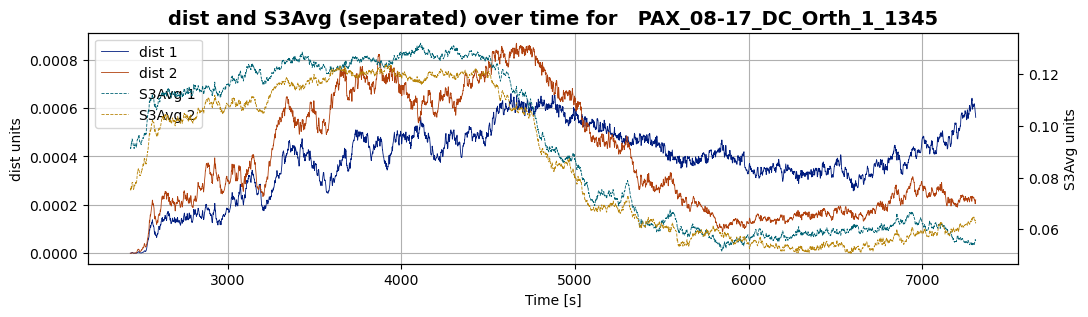

In [34]:
ds_temp.plot_separated(plot_param='dist', plot_param_2='S3Avg')

### Preliminary test on DC Switching dataset

In [11]:
plt.ioff();

In [35]:
filepath_DC_1_1345='Datasets/Whole_setup/08-17/PAX_08-17_DC_Orth_1_1345.csv'
ds_DC_1_1345 = SwitchSet(filepath_DC_1_1345,set_range=(0.05,0.75))

Time range: min=2439.848, max=36693.33


=== performing change point detection ===
cp range: (2500.0, 2600.0)
using 7169 data entries
skipping 4327 points
considering params: ['s1', 's2', 's3']

--- switch param: s1 ---
size of data we are using = (7169,)
computing range... ---> range = (0.17,0.23)
displaying jump_fig for switch parameter = s1



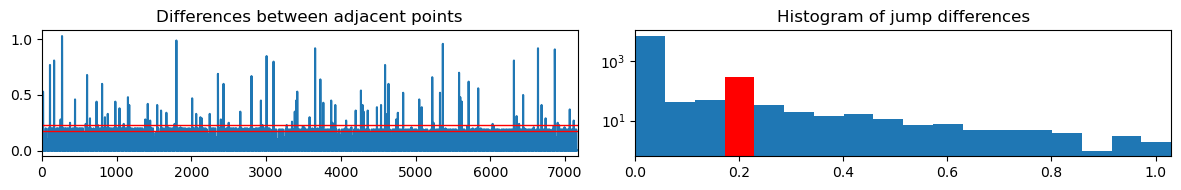



found width of 0.057 for s1
greater than prev width of -1.000 for None
--- end of switch param: s1 ---

--- switch param: s2 ---
size of data we are using = (7169,)
computing range... ---> range = (1.94,2.00)
displaying jump_fig for switch parameter = s2



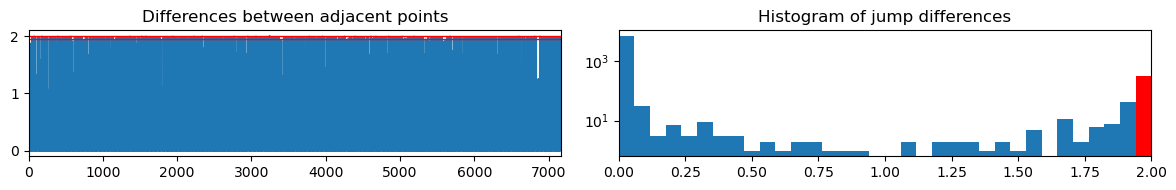



found width of 0.059 for s2
greater than prev width of 0.057 for s1
--- end of switch param: s2 ---

--- switch param: s3 ---
size of data we are using = (7169,)
computing range... ---> range = (0.09,0.15)
displaying jump_fig for switch parameter = s3



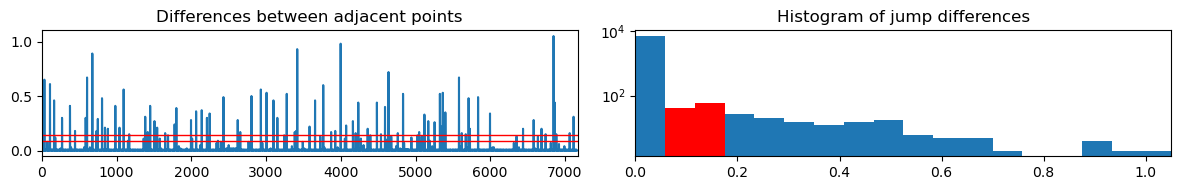



--- end of switch param: s3 ---

---> switch parameter found: s2 <---
finding differences within range = (1.94,2.00)
Jump points detected: 313
out of total: ~399.9

computing offset...


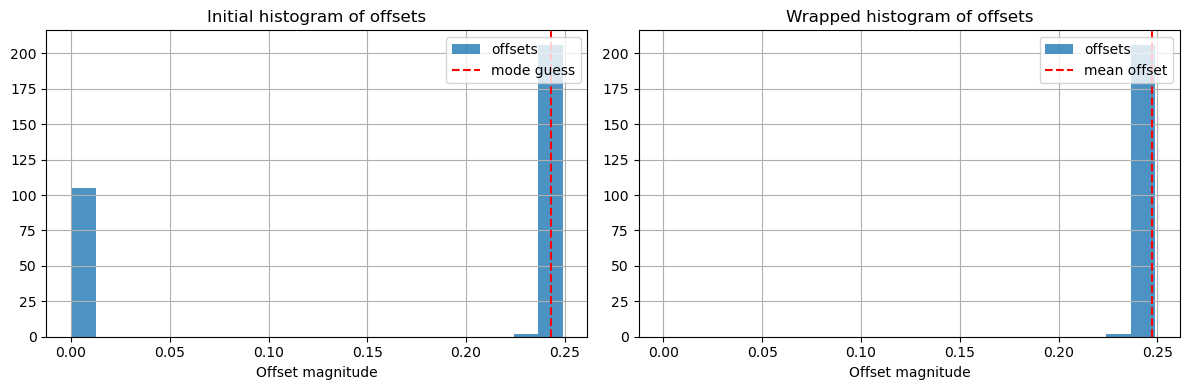



offset = 0.247 seconds
=== end change point detection ===
=== performing change point detection ===
cp range: (6000.0, 6100.0)
using 7184 data entries
skipping 254317 points
considering params: ['s1', 's2', 's3']

--- switch param: s1 ---
size of data we are using = (7184,)
computing range... ---> range = (0.17,0.23)
displaying jump_fig for switch parameter = s1



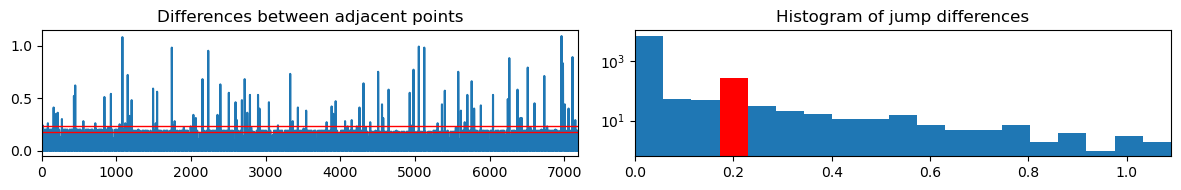



found width of 0.057 for s1
greater than prev width of -1.000 for None
--- end of switch param: s1 ---

--- switch param: s2 ---
size of data we are using = (7184,)
computing range... ---> range = (1.94,2.00)
displaying jump_fig for switch parameter = s2



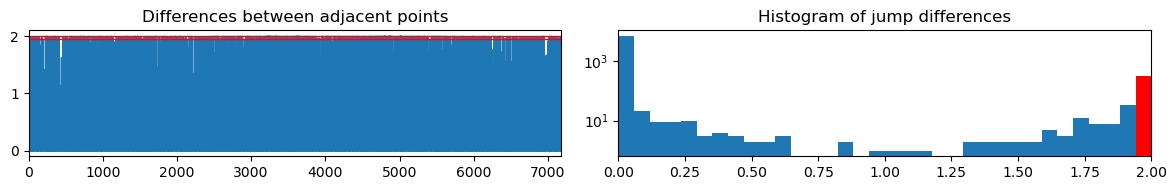



found width of 0.059 for s2
greater than prev width of 0.057 for s1
--- end of switch param: s2 ---

--- switch param: s3 ---
size of data we are using = (7184,)
computing range... ---> range = (0.09,0.15)
displaying jump_fig for switch parameter = s3



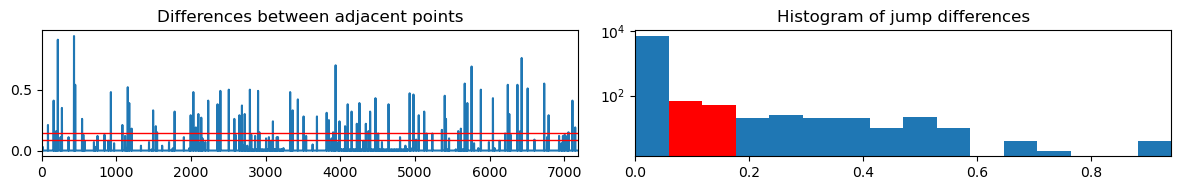



--- end of switch param: s3 ---

---> switch parameter found: s2 <---
finding differences within range = (1.94,2.00)
Jump points detected: 318
out of total: ~399.9

computing offset...


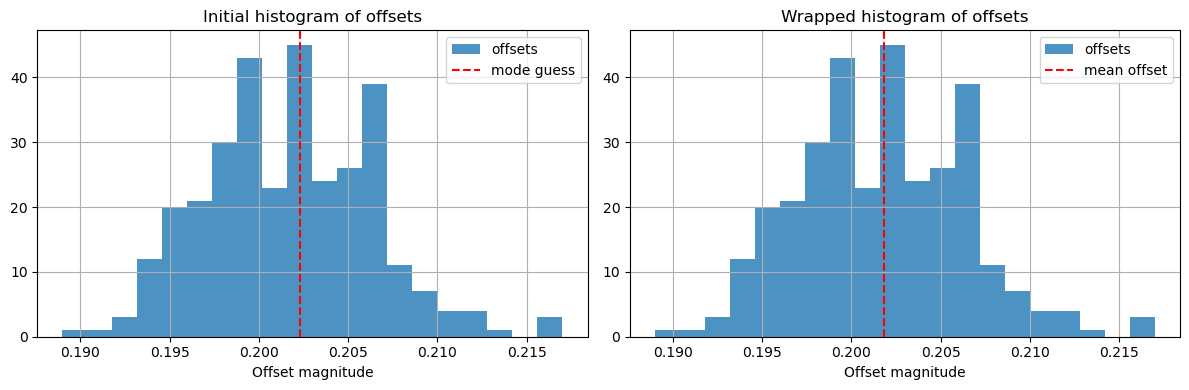



offset = 0.202 seconds
=== end change point detection ===
Nominal Switch Time = 0.2500000
Offset change of -0.045 seconds over 14000.0 switches
Corrected Switch Time = 0.2499968
=== starting average_data ===
averaging data... Done
Dropped 105 observations with <4 points (out of total 136923 observations)

--- interpolating data ---
length before: 68419
length after: 68507
88 total added
--- end interpolating data ---

--- interpolating data ---
length before: 68399
length after: 68507
108 total added
--- end interpolating data ---
Signal 1 size=68507	Signal 1 range: t=(2440.37,36692.93)
Signal 2 size=68507	Signal 2 range: t=(2440.12,36692.68)
=== end average_data ===


In [36]:
ds_DC_1_1345.find_switches(nominal_switch_rate=2, change_point_range_1=(2500,2600), change_point_range_2=(6000,6100), print_process=True)
ds_DC_1_1345.average_data(print_process=True)

In [37]:
ds_DC_1_1345.calc_transfer(input_stokes='first')

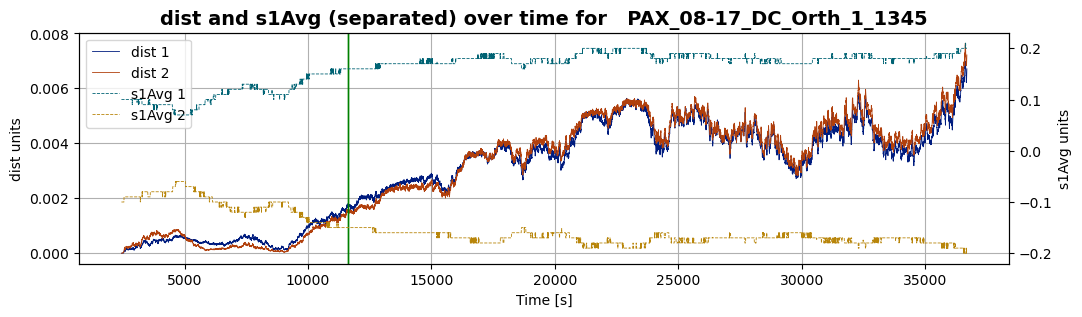

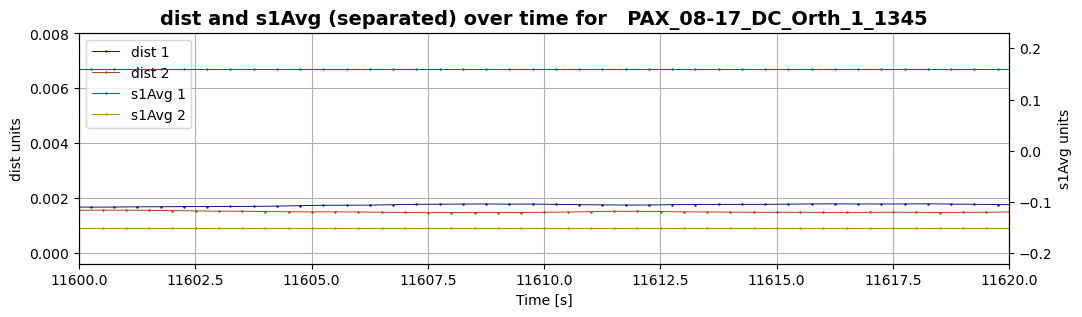

In [45]:
ds_DC_1_1345.plot_separated(plot_param='dist', plot_param_2='s1Avg', sample_range=(11600,11620))

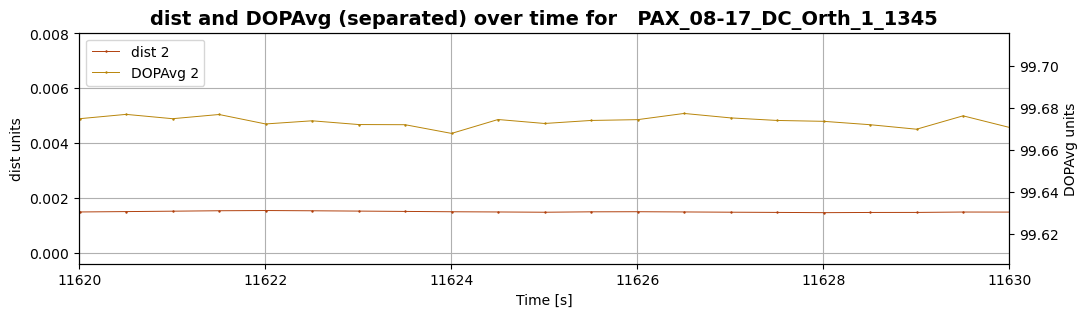

In [40]:
ds_DC_1_1345.plot_separated(birds_eye=False, plot_param='dist', plot_param_2='DOPAvg', sample_range=(11620,11630), plot_signal=2)

Number of taus used for signal 1: 2394
Number of taus used for signal 2: 2394


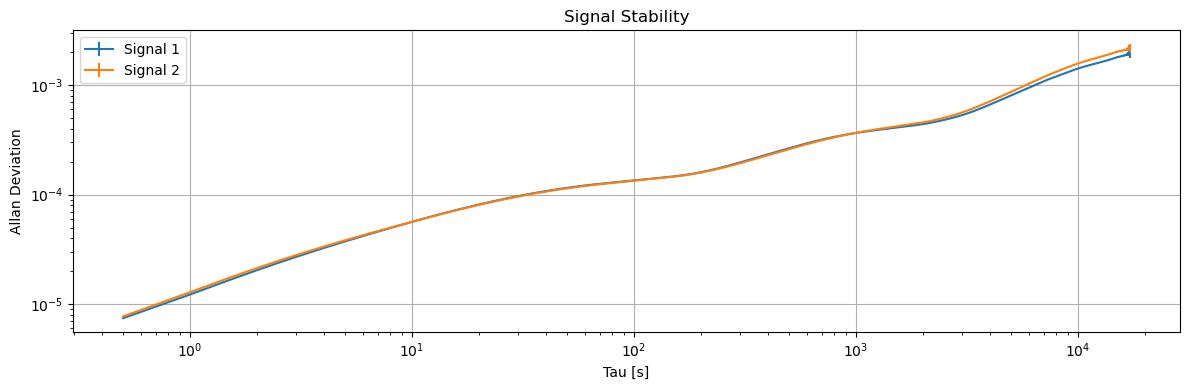

In [41]:
ds_DC_1_1345.adev(plot_param='dist', plot_adev=True);

### DOP Investigation (discontinued)

In [ ]:
filepath_DC_1_1345='Datasets/Whole_setup/08-17/PAX_08-17_DC_Orth_1_1345.csv'
ds_DC_1_1345 = SwitchSet(filepath_DC_1_1345,set_range=(0.05,0.35))

In [ ]:
ds_DC_1_1345.find_switches(nominal_switch_rate=2, change_point_range_1=(2500,2600), print_process=True)
ds_DC_1_1345.average_data(print_process=True)
ds_DC_1_1345.calc_transfer(input_stokes='first')

In [254]:
df_raw = ds_DC_1_1345.df

In [256]:
df_raw[['TimeElapsed','S0','S1','S2','S3','DOP','s1','s2','s3','Power']].head()

TimeElapsed    S0      S1     S2       S3     DOP   s1    s2    s3  Power
0     2439.848  1.31  0.1345 -1.305  0.09144  100.35  0.1 -0.99  0.07   1.31
1     2439.858  1.31  0.1346 -1.305  0.09127  100.34  0.1 -0.99  0.07   1.31
2     2439.878  1.31  0.1345 -1.305  0.09102  100.33  0.1 -0.99  0.07   1.31
3     2439.888  1.31  0.1344 -1.305  0.09130  100.35  0.1 -0.99  0.07   1.31
4     2439.918  1.31  0.1346 -1.305  0.09135  100.34  0.1 -0.99  0.07   1.31

In [179]:
df = ds_DC_1_1345.signal_1_df

In [180]:
df[['EstTime','S0Avg','S1Avg','S2Avg','S3Avg','DOPAvg','s1Avg','s2Avg','s3Avg','PowerAvg']].head()

EstTime  S0Avg     S1Avg     S2Avg     S3Avg      DOPAvg  s1Avg  s2Avg  \
0  2440.373677  1.312  0.134882 -1.306636  0.091262  100.344545    0.1  -0.99   
1  2440.873671  1.313  0.134908 -1.307000  0.091239  100.344615    0.1  -0.99   
2  2441.373664  1.313  0.134527 -1.307000  0.091423  100.340909    0.1  -0.99   
3  2441.873658  1.312  0.134060 -1.306133  0.091739  100.346667    0.1  -0.99   
4  2442.373651  1.311  0.133840 -1.306000  0.091794  100.345000    0.1  -0.99   

   s3Avg  PowerAvg  
0   0.07     1.312  
1   0.07     1.313  
2   0.07     1.313  
3   0.07     1.312  
4   0.07     1.311

In [181]:
min_cutoff = 101
frac = len(df[df['DOPAvg']>min_cutoff]) / len(df)
print('Fraction of DOP values greater than {:d}: {:.5f} ({:.3f}%)'.format(min_cutoff,frac,frac*100))

Fraction of DOP values greater than 101: 0.00000 (0.000%)


In [183]:
max_cutoff = 99
frac = len(df[df['DOPAvg']<max_cutoff]) / len(df)
print('Fraction of DOP values less than {:d}: {:.5f} ({:.3f}%)'.format(max_cutoff,frac,frac*100))

Fraction of DOP values less than 99: 0.00000 (0.000%)


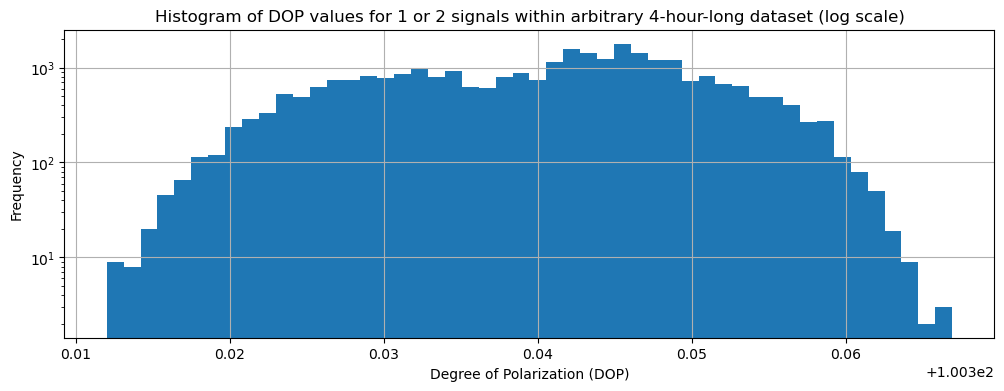

In [187]:
plt.ion()
plt.figure(figsize=(12,4))
plt.hist(df['DOPAvg'], bins=50, log=True)
plt.xlabel('Degree of Polarization (DOP)')
plt.ylabel('Frequency')
plt.title('Histogram of DOP values for 1 or 2 signals within arbitrary 4-hour-long dataset (log scale)')
plt.grid()
plt.show()

In [188]:
df[df['DOPAvg']>cutoff][['EstTime','S0Avg','S1Avg','S2Avg','S3Avg','DOPAvg','s1Avg','s2Avg','s3Avg','PowerAvg']].head(8)

Empty DataFrame
Columns: [EstTime, S0Avg, S1Avg, S2Avg, S3Avg, DOPAvg, s1Avg, s2Avg, s3Avg, PowerAvg]
Index: []

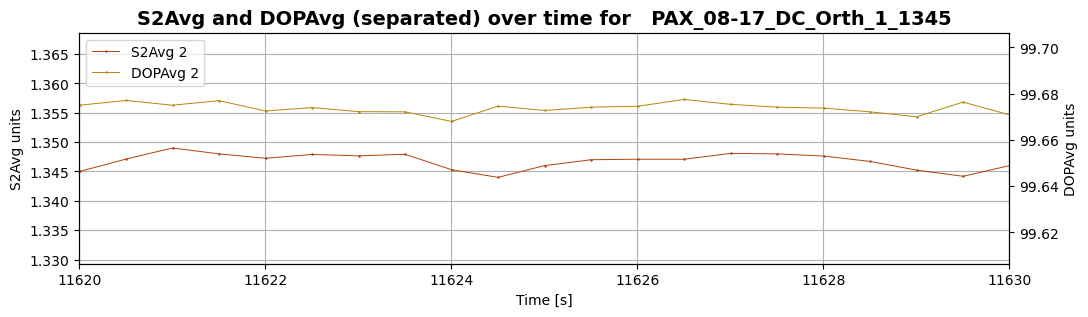

In [192]:
plt.ioff()
ds_DC_1_1345.plot_separated(birds_eye=False, plot_param='S2Avg', plot_param_2='DOPAvg', sample_range=(11620,11630), plot_signal=2)

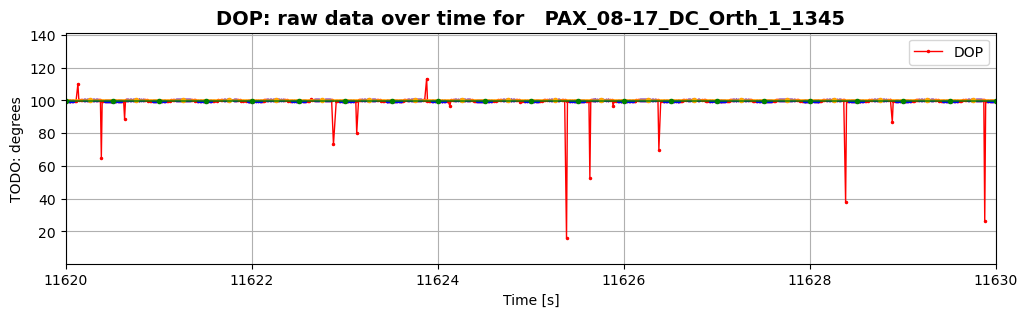

In [193]:
ds_DC_1_1345.plot_raw(birds_eye=False, plot_param='DOP', plot_valid=True, plot_avg=True, sample_range=(11620,11630))

### Use on ARL Switching dataset

In [9]:
plt.ioff();
plt.close('all');

In [10]:
filepath_ARL_1_1345='Datasets/Whole_setup/08-17/PAX_08-17_ARL_Orth_1_1345.csv'
ds_ARL_1_1345 = SwitchSet(filepath_ARL_1_1345,set_range=(0,0.05), skip_default_signal_baseline=600)

Time range: min=600.017, max=2236.844


Determining change point ranges automatically...
Using change_point_range_1=(600.017, 700.017)
Using change_point_range_2=(2136.844, 2236.844)
=== performing change point detection ===
cp range: (600.017, 700.017)
using 6437 data entries
skipping 0 points
considering params: ['s1', 's2', 's3']

--- switch param: s1 ---
size of data we are using = (6437,)
computing range... ---> range = (0.88,0.93)
displaying jump_fig for switch parameter = s1



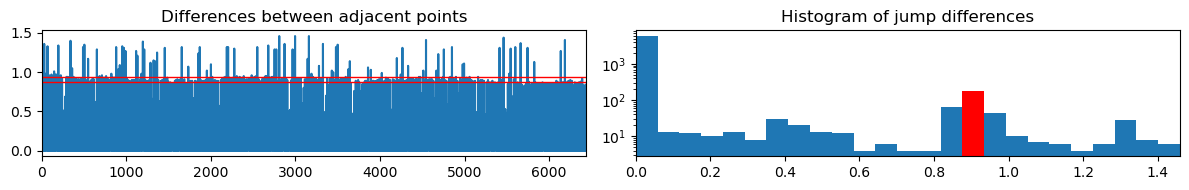



found width of 0.058 for s1
greater than prev width of -1.000 for None
--- end of switch param: s1 ---

--- switch param: s2 ---
size of data we are using = (6437,)
computing range... ---> range = (0.11,0.17)
displaying jump_fig for switch parameter = s2



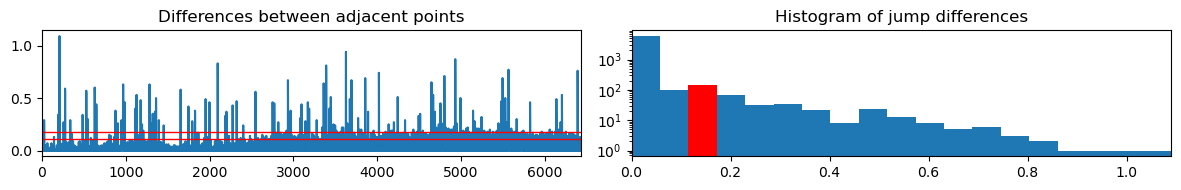



--- end of switch param: s2 ---

--- switch param: s3 ---
size of data we are using = (6437,)
computing range... ---> range = (1.71,1.77)
displaying jump_fig for switch parameter = s3



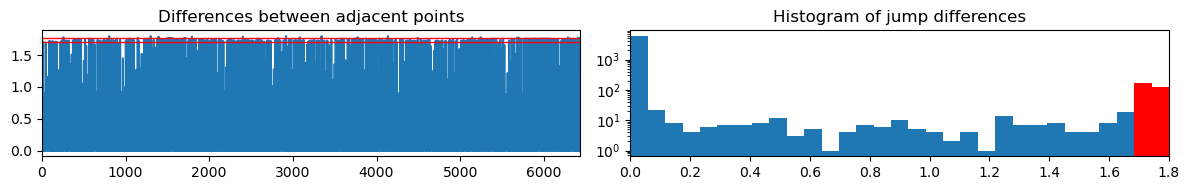



--- end of switch param: s3 ---

---> switch parameter found: s1 <---
finding differences within range = (0.88,0.93)
Jump points detected: 183
out of total: ~400.0

computing offset...


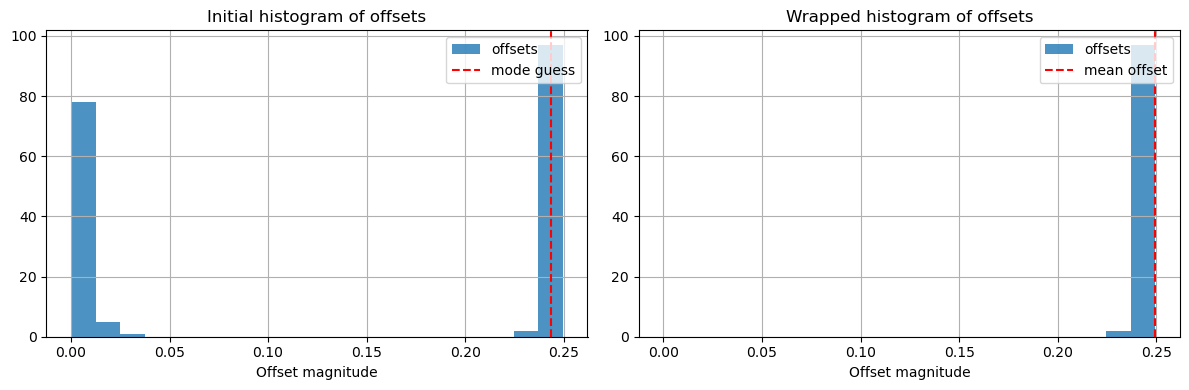



offset = 0.249 seconds
=== end change point detection ===
=== performing change point detection ===
cp range: (2136.844, 2236.844)
using 6747 data entries
skipping 102812 points
considering params: ['s1', 's2', 's3']

--- switch param: s1 ---
size of data we are using = (6747,)
computing range... ---> range = (0.44,0.49)
displaying jump_fig for switch parameter = s1



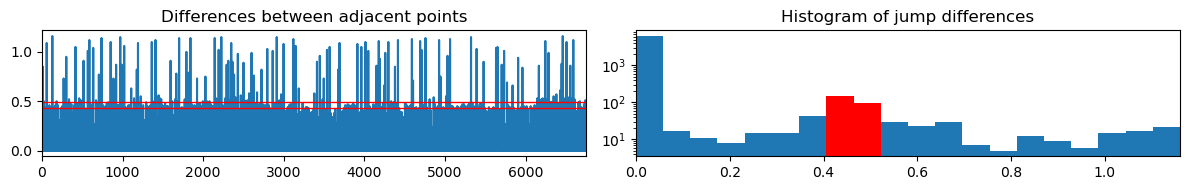



found width of 0.058 for s1
greater than prev width of -1.000 for None
--- end of switch param: s1 ---

--- switch param: s2 ---
size of data we are using = (6747,)
computing range... ---> range = (0.14,0.20)
displaying jump_fig for switch parameter = s2



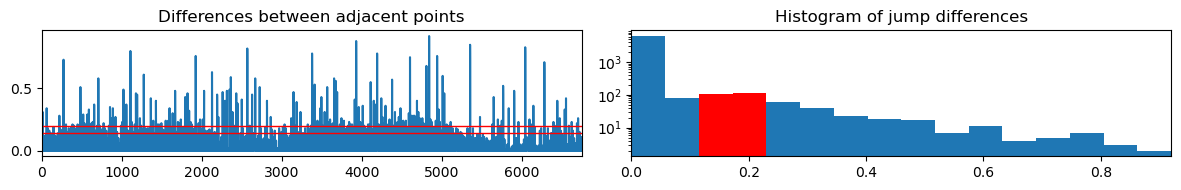



--- end of switch param: s2 ---

--- switch param: s3 ---
size of data we are using = (6747,)
computing range... ---> range = (1.87,1.93)
displaying jump_fig for switch parameter = s3



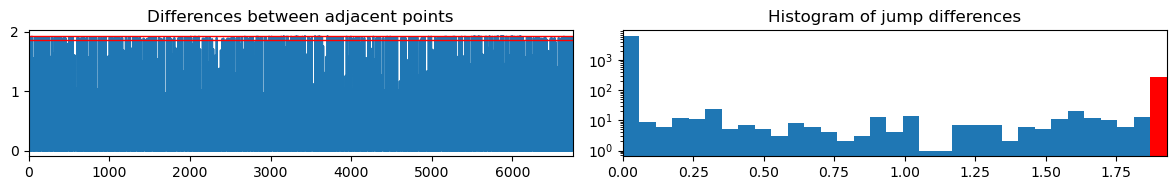



found width of 0.058 for s3
greater than prev width of 0.058 for s1
--- end of switch param: s3 ---

---> switch parameter found: s3 <---
finding differences within range = (1.87,1.93)
Jump points detected: 273
out of total: ~400.0

computing offset...


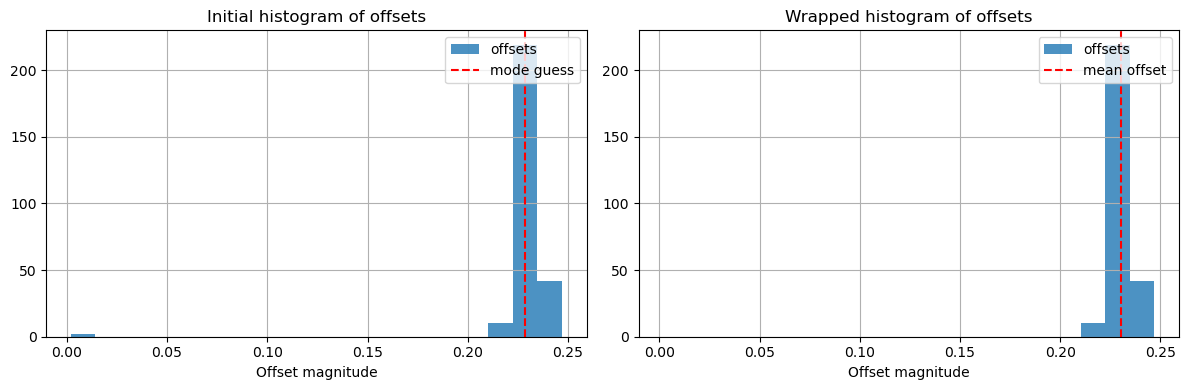



offset = 0.230 seconds
=== end change point detection ===
Nominal Switch Time = 0.2500000
Offset change of -0.019 seconds over 6147.308 switches
Corrected Switch Time = 0.2499969
=== starting average_data ===
averaging data... Done
Dropped 5 observations with <4 points (out of total 6510 observations)

--- interpolating data ---
length before: 3254
length after: 3273
19 total added
--- end interpolating data ---

--- interpolating data ---
length before: 3251
length after: 3273
22 total added
--- end interpolating data ---
Signal 1 size=3273	Signal 1 range: t=(600.38,2236.35)
Signal 2 size=3273	Signal 2 range: t=(600.63,2236.60)
=== end average_data ===


In [11]:
ds_ARL_1_1345.find_switches(nominal_switch_rate=2, print_process=True)
ds_ARL_1_1345.average_data(print_process=True)

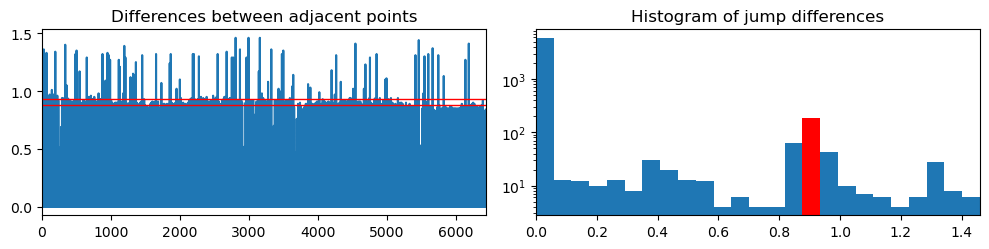

In [78]:
f1.set_size_inches(10,2.6)
for ax in ZI_fig.get_axes():
    ax.set_title(ax.get_title(), fontsize=14, fontweight='bold')
f1.tight_layout()
display(f1); plt.close(f1)
f1.savefig('CP_hist.png')

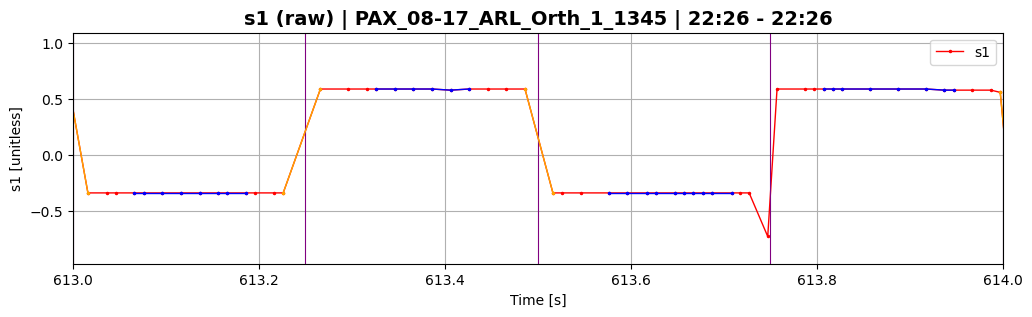

In [98]:
ds_ARL_1_1345.plot_raw(sample_range=(613,614), birds_eye=False, plot_switch=True, plot_valid=True, plot_jumps=True)

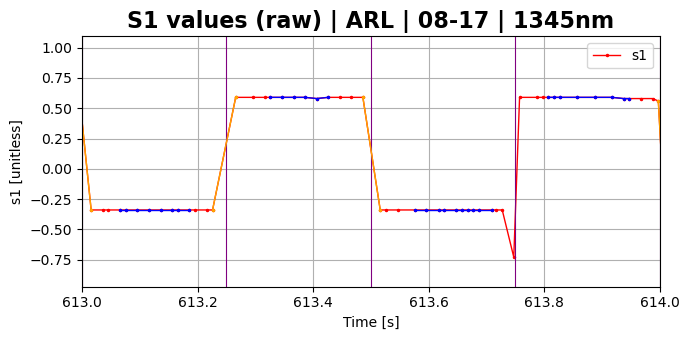

In [72]:
ZI_fig.set_size_inches(7,3.5)
ax = ZI_fig.gca()
ax.set_title('S1 values (raw) | ARL | 08-17 | 1345nm', fontsize=16, fontweight='bold')
ZI_fig.tight_layout()
display(ZI_fig); plt.close(ZI_fig)
ZI_fig.savefig('CP_Segment.png')

In [99]:
ds_ARL_1_1345.calc_similarity(input_stokes='first')

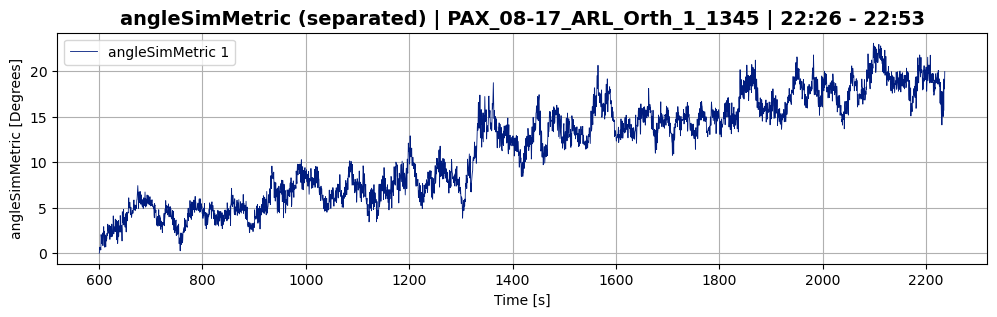

In [100]:
ds_ARL_1_1345.plot_separated(plot_param='angleSimMetric', plot_signal=1)

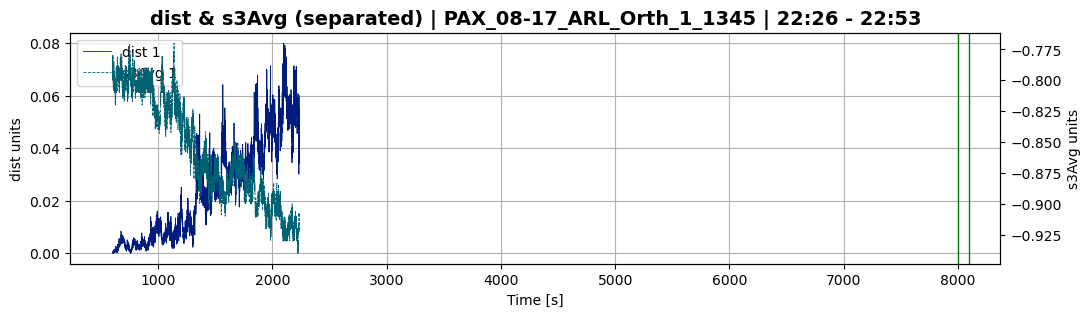

KeyError: nan

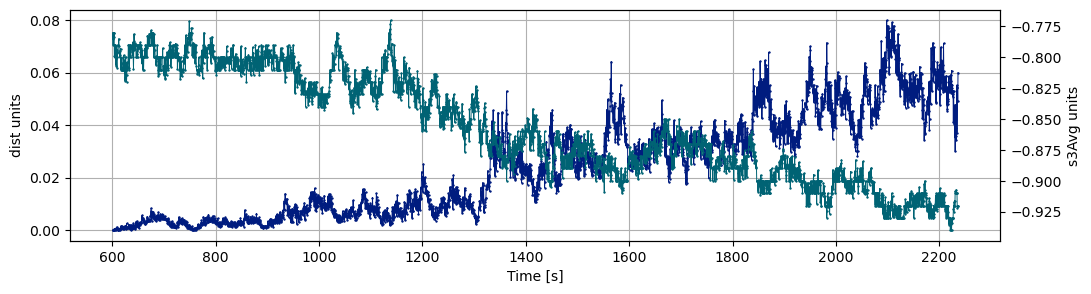

In [96]:
ds_ARL_1_1345.plot_separated(plot_param='dist', plot_param_2='s3Avg', sample_range=(8000,8100), plot_signal=1)

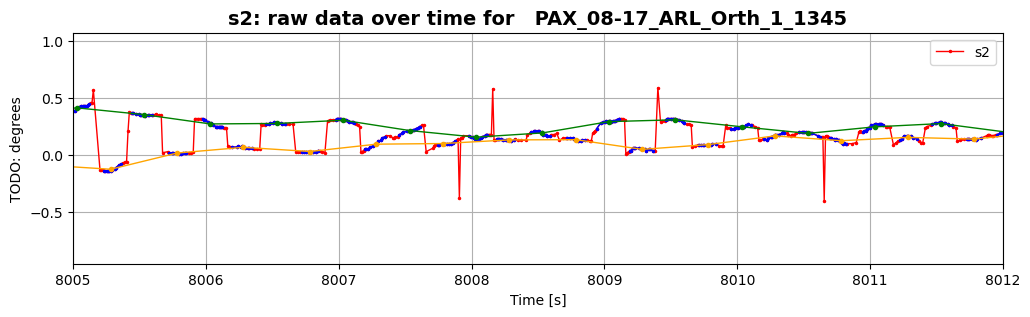

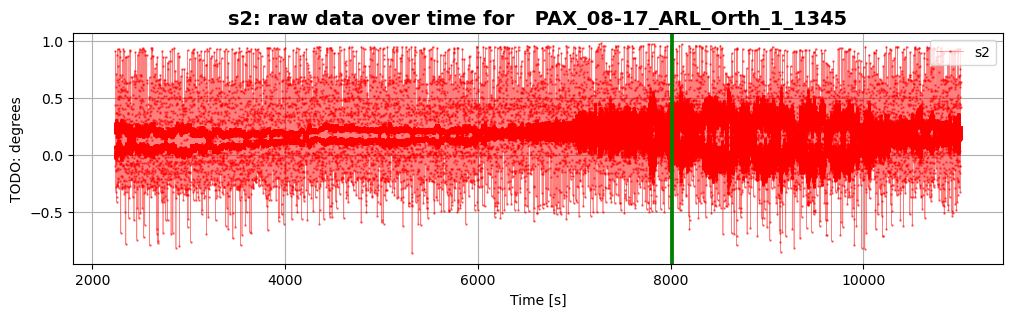

In [12]:
ds_ARL_1_1345.plot_raw(birds_eye=False, plot_param='s2', sample_range=(8005,8012), plot_valid=True, plot_avg=True)

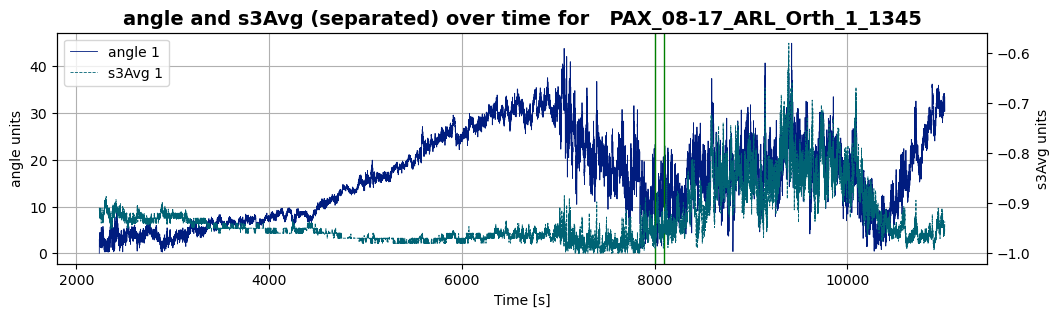

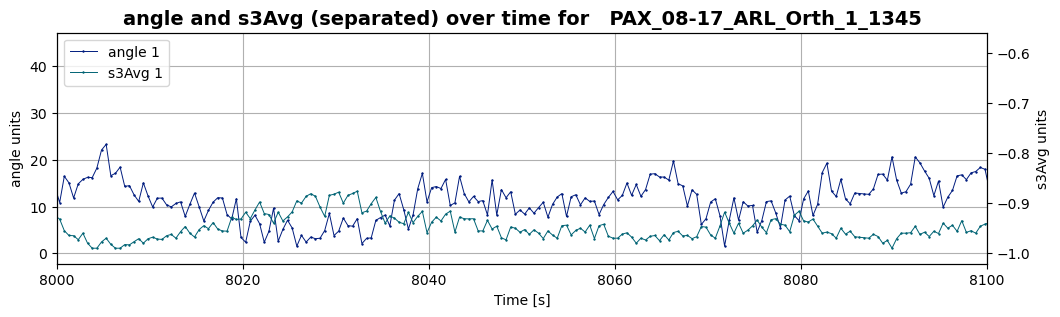

In [17]:
ds_ARL_1_1345.plot_separated(plot_param='angle', plot_param_2='s3Avg', sample_range=(8000,8100), plot_signal=1)

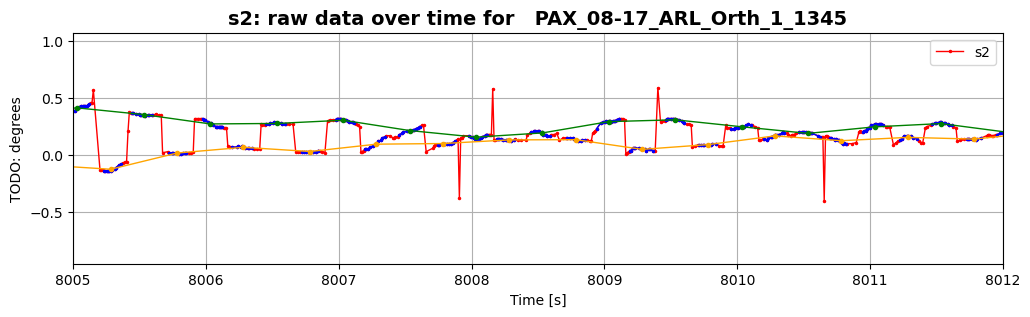

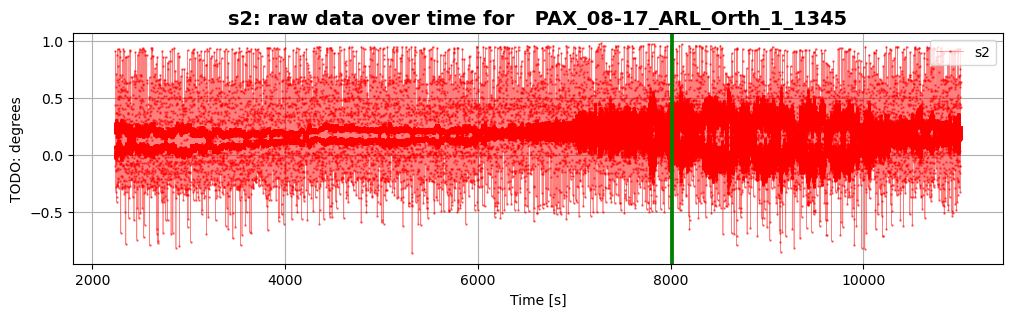

In [12]:
ds_ARL_1_1345.plot_raw(birds_eye=False, plot_param='s2', sample_range=(8005,8012), plot_valid=True, plot_avg=True)

In [101]:
ds_ARL_1_1345.adev(plot_param='angle', plot_adev=True)

TypeError: 'NoneType' object is not subscriptable

### Small portion of ARL switching dataset for allan dev

In [46]:
filepath_ARL_1_1345='Datasets/Whole_setup/08-17/PAX_08-17_ARL_Orth_1_1345.csv'
ds_temp = SwitchSet(filepath_ARL_1_1345,set_range=(0.05,0.1))

Time range: min=2236.844, max=4425.925


Determining change point ranges automatically...
Using change_point_range_1=(2236.844, 2336.844)
Using change_point_range_2=(4325.925, 4425.925)
=== performing change point detection ===
cp range: (2236.844, 2336.844)
using 6767 data entries
skipping 0 points
considering params: ['s1', 's2', 's3']

--- switch param: s1 ---
size of data we are using = (6767,)
computing range... ---> range = (0.44,0.50)
displaying jump_fig for switch parameter = s1



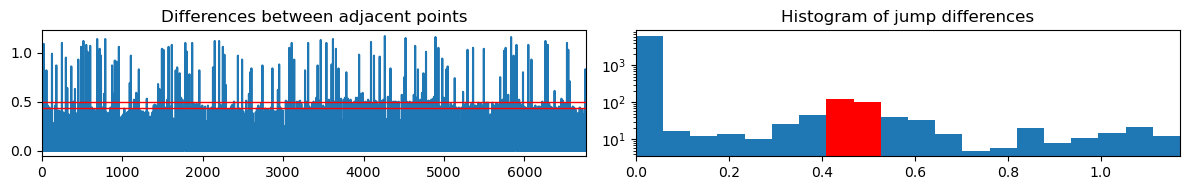



found width of 0.058 for s1
greater than prev width of -1.000 for None
--- end of switch param: s1 ---

--- switch param: s2 ---
size of data we are using = (6767,)
computing range... ---> range = (0.14,0.20)
displaying jump_fig for switch parameter = s2



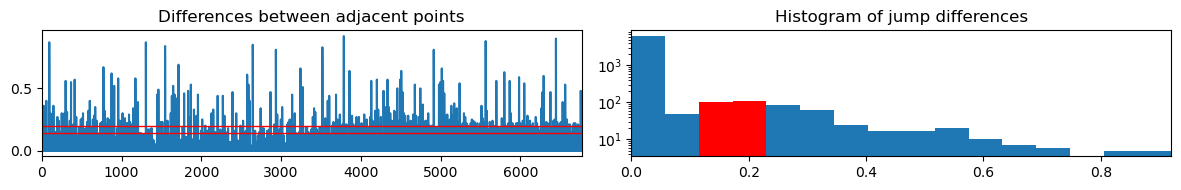



--- end of switch param: s2 ---

--- switch param: s3 ---
size of data we are using = (6767,)
computing range... ---> range = (1.88,1.94)
displaying jump_fig for switch parameter = s3



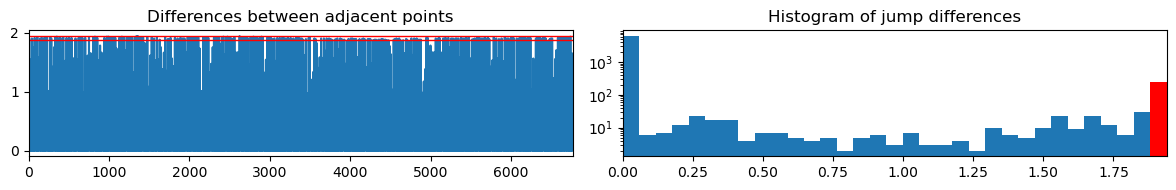



found width of 0.059 for s3
greater than prev width of 0.058 for s1
--- end of switch param: s3 ---

---> switch parameter found: s3 <---
finding differences within range = (1.88,1.94)
Jump points detected: 243
out of total: ~400.0

computing offset...


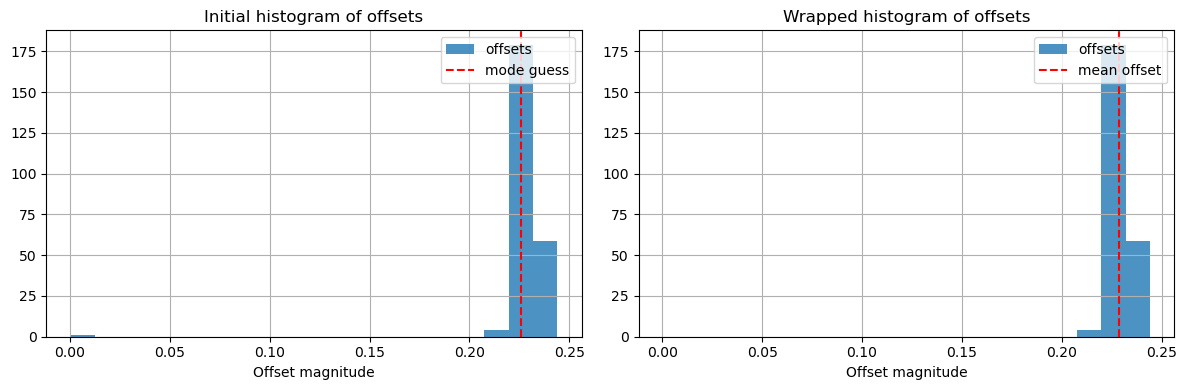



offset = 0.229 seconds
=== end change point detection ===
=== performing change point detection ===
cp range: (4325.925, 4425.925)
using 6757 data entries
skipping 140956 points
considering params: ['s1', 's2', 's3']

--- switch param: s1 ---
size of data we are using = (6757,)
computing range... ---> range = (0.20,0.26)
displaying jump_fig for switch parameter = s1



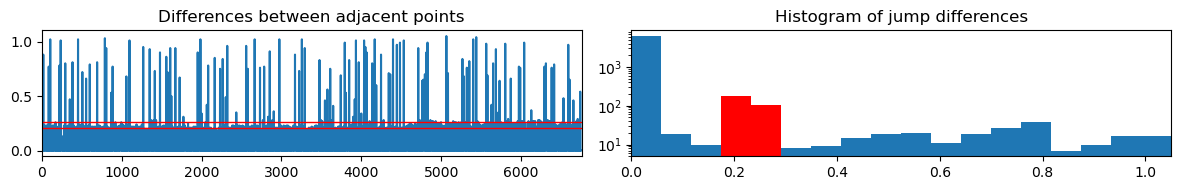



found width of 0.058 for s1
greater than prev width of -1.000 for None
--- end of switch param: s1 ---

--- switch param: s2 ---
size of data we are using = (6757,)
computing range... ---> range = (0.09,0.15)
displaying jump_fig for switch parameter = s2



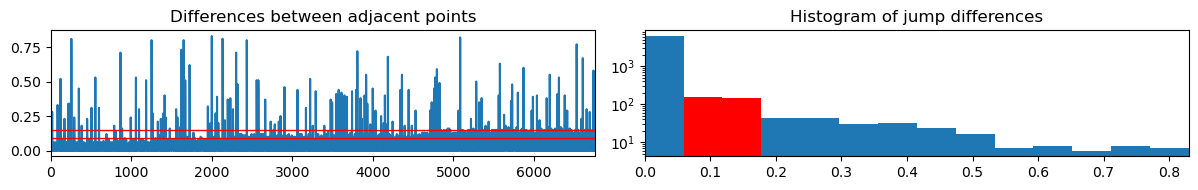



found width of 0.059 for s2
greater than prev width of 0.058 for s1
--- end of switch param: s2 ---

--- switch param: s3 ---
size of data we are using = (6757,)
computing range... ---> range = (1.89,1.95)
displaying jump_fig for switch parameter = s3



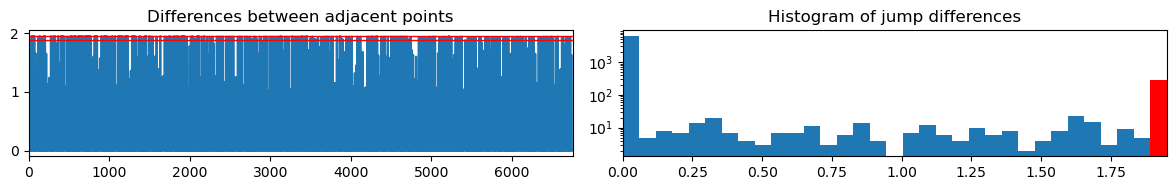



--- end of switch param: s3 ---

---> switch parameter found: s2 <---
finding differences within range = (0.09,0.15)
Jump points detected: 161
out of total: ~399.9

computing offset...


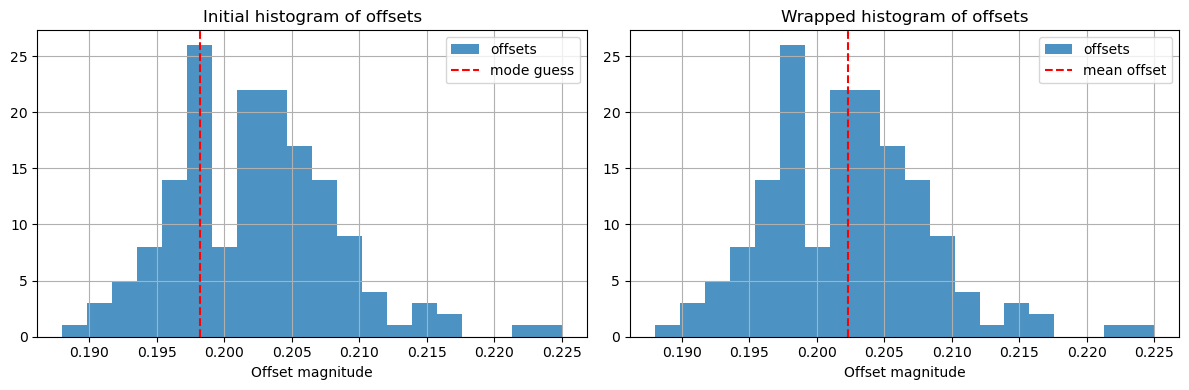



offset = 0.202 seconds
=== end change point detection ===
Nominal Switch Time = 0.2500000
Offset change of -0.026 seconds over 8356.324 switches
Corrected Switch Time = 0.2499968
=== starting average_data ===
averaging data... Done
Dropped 6 observations with <4 points (out of total 8709 observations)

--- interpolating data ---
length before: 4353
length after: 4378
25 total added
--- end interpolating data ---

--- interpolating data ---
length before: 4350
length after: 4377
27 total added
--- end interpolating data ---
Signal 1 size=4377	Signal 1 range: t=(2237.35,4425.33)
Signal 2 size=4378	Signal 2 range: t=(2237.10,4425.58)
=== end average_data ===


In [47]:
ds_temp.find_switches(print_process=True)
ds_temp.average_data(print_process=True)

In [48]:
ds_temp.calc_transfer(input_stokes='first')

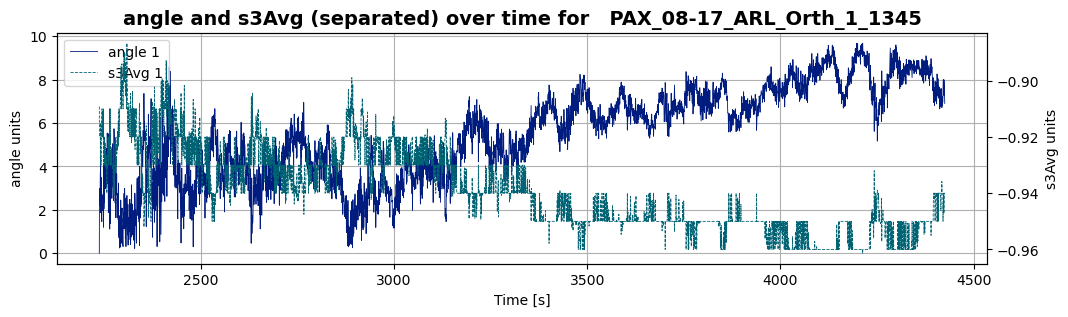

In [49]:
ds_temp.plot_separated(plot_param='angle', plot_param_2='s3Avg', plot_signal=1)

Number of taus used for signal 1: 1370
Number of taus used for signal 2: 1370


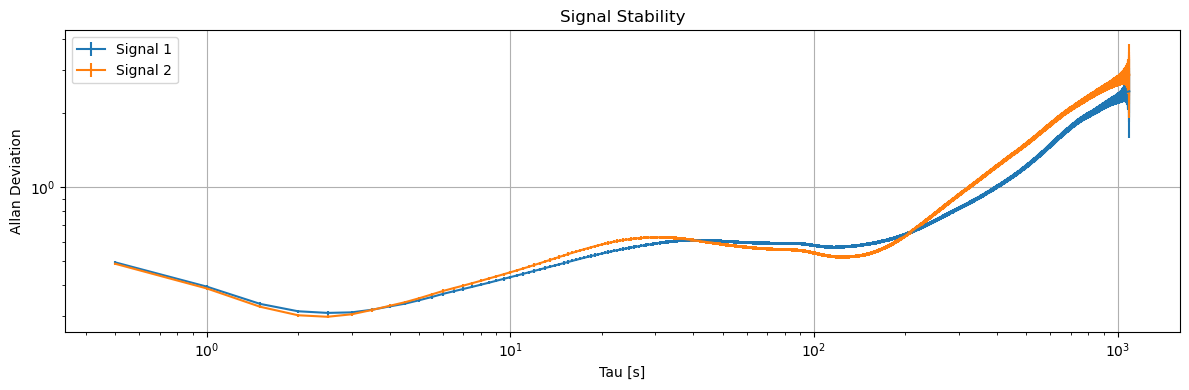

In [50]:
ds_temp.adev(plot_param='angle', plot_adev=True);

### In a loop now!

Time range: min=2236.844, max=4425.925


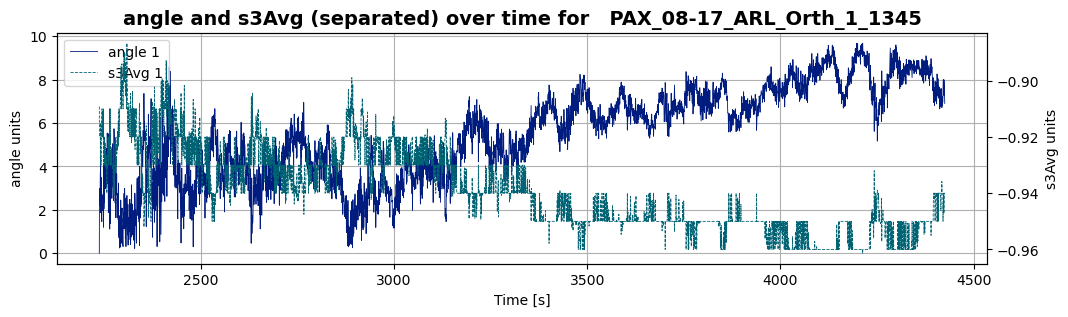

Number of taus used for signal 1: 1370
Number of taus used for signal 2: 1370


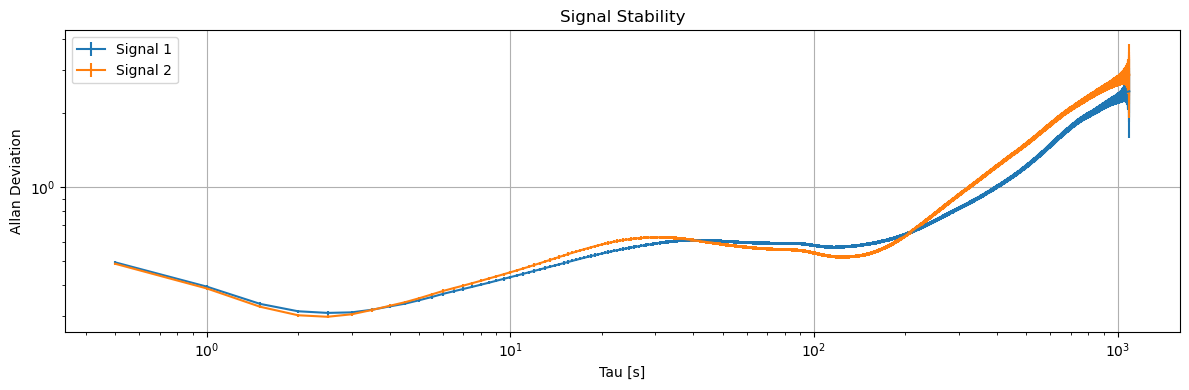

Time range: min=4425.935, max=6617.273


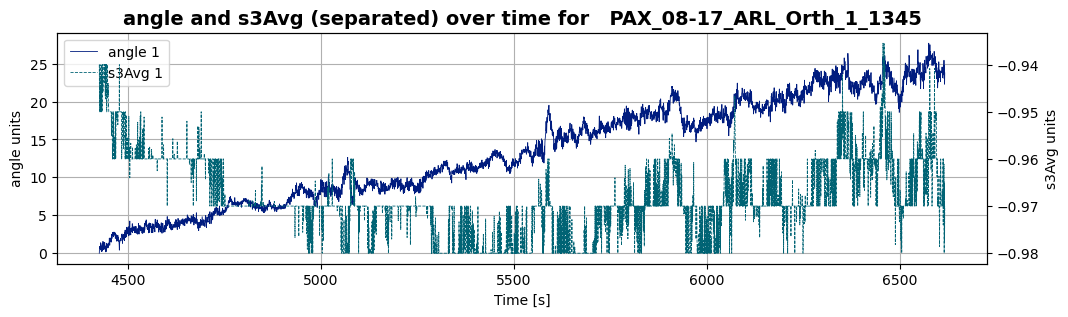

Number of taus used for signal 1: 1371
Number of taus used for signal 2: 1371


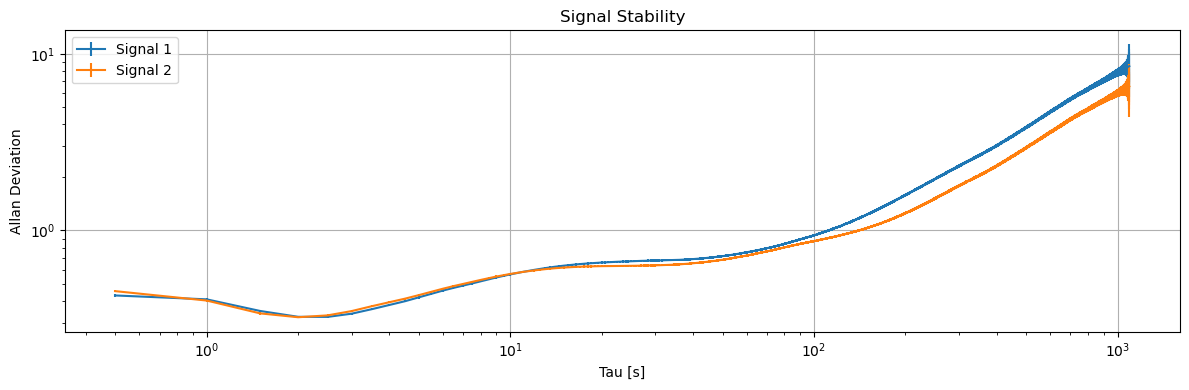

Time range: min=6617.293, max=8819.27


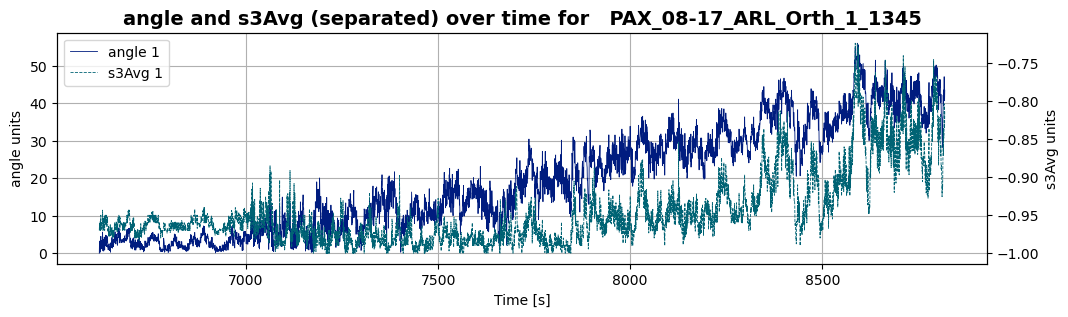

Number of taus used for signal 1: 1374
Number of taus used for signal 2: 1374


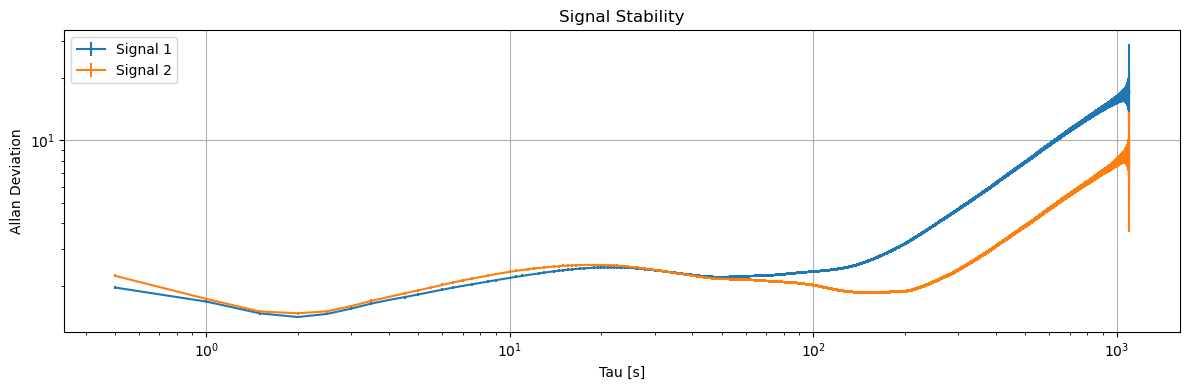

Time range: min=8819.29, max=11010.803


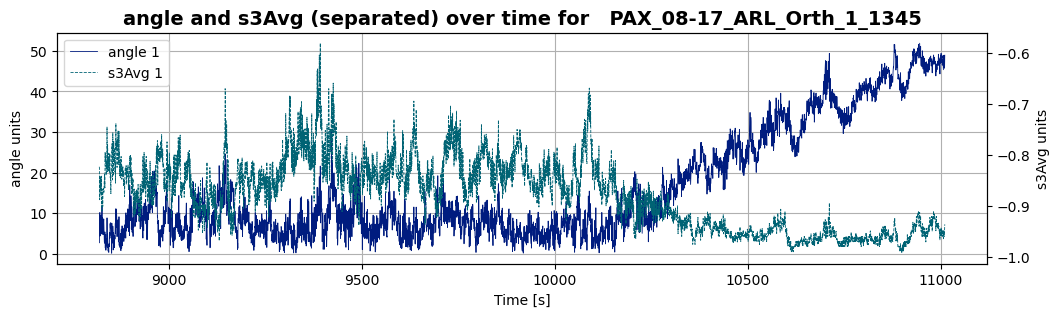

Number of taus used for signal 1: 1371
Number of taus used for signal 2: 1371


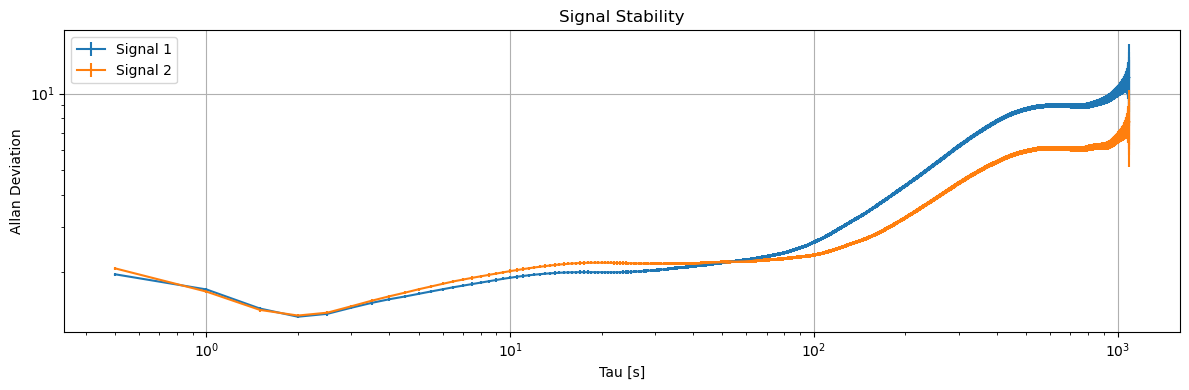

Time range: min=11010.833, max=13219.436


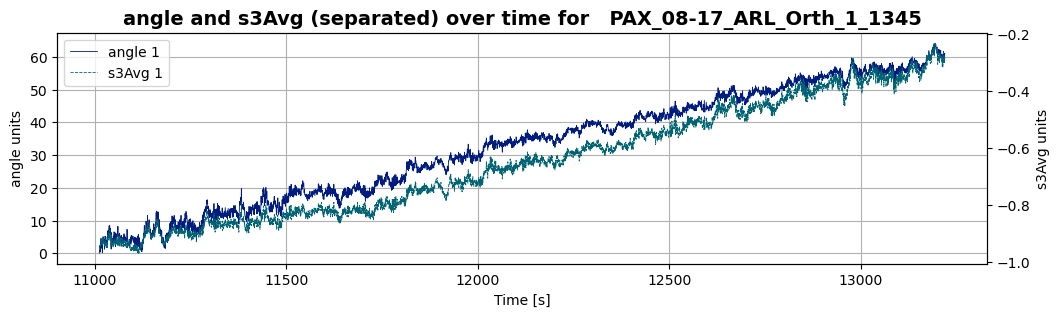

Number of taus used for signal 1: 1375
Number of taus used for signal 2: 1375


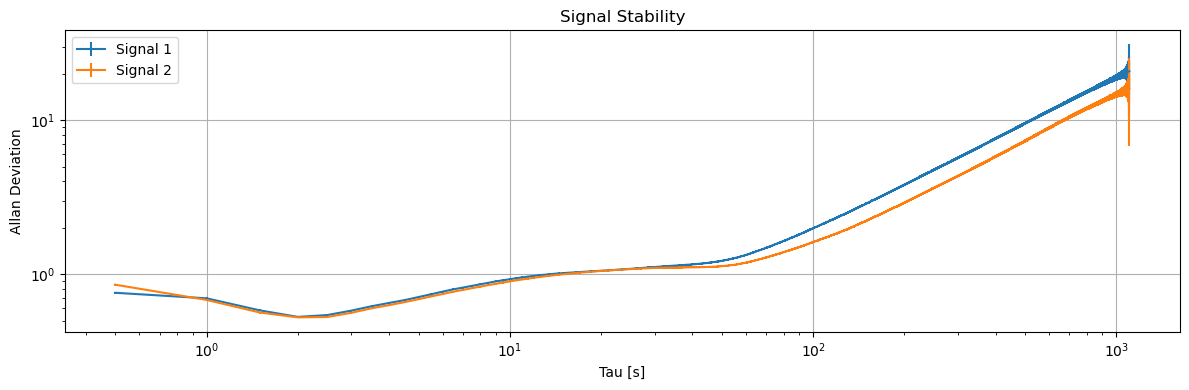

Time range: min=13219.446, max=15368.199


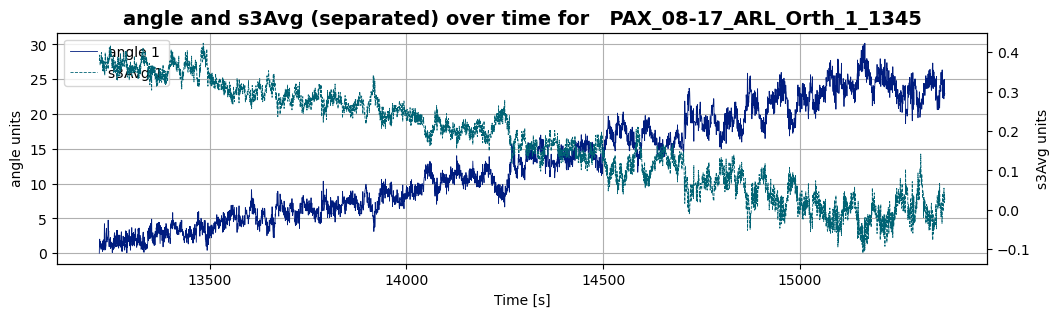

Number of taus used for signal 1: 1362
Number of taus used for signal 2: 1362


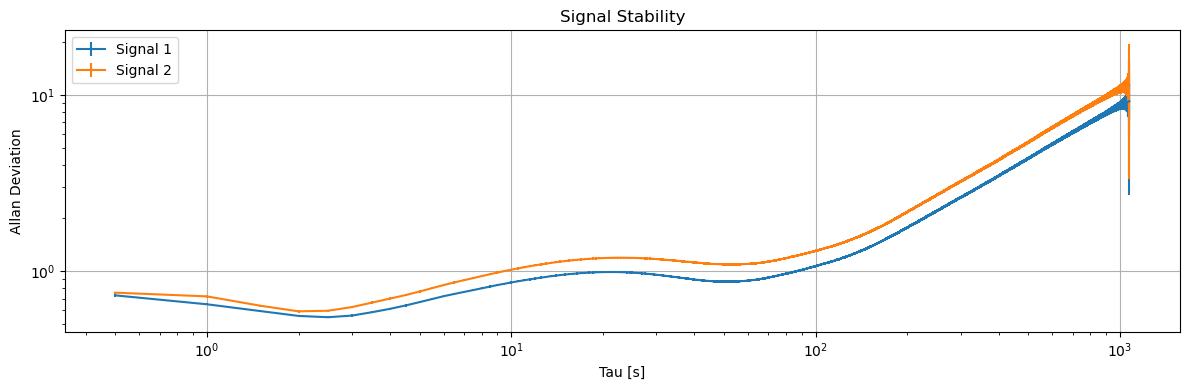

Time range: min=15368.211, max=17527.189


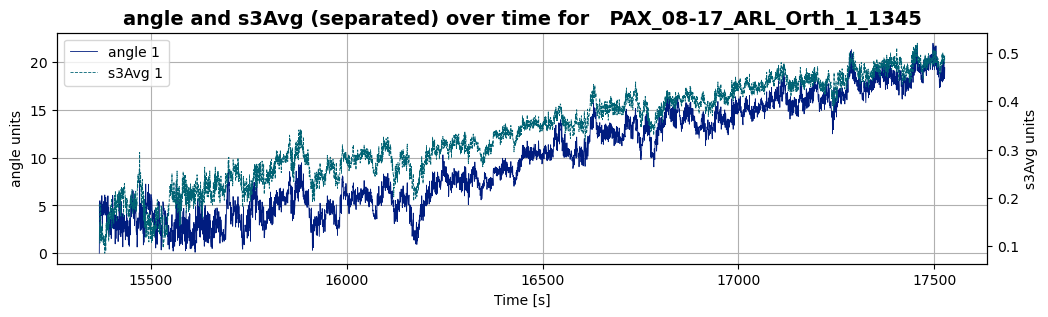

Number of taus used for signal 1: 1364
Number of taus used for signal 2: 1364


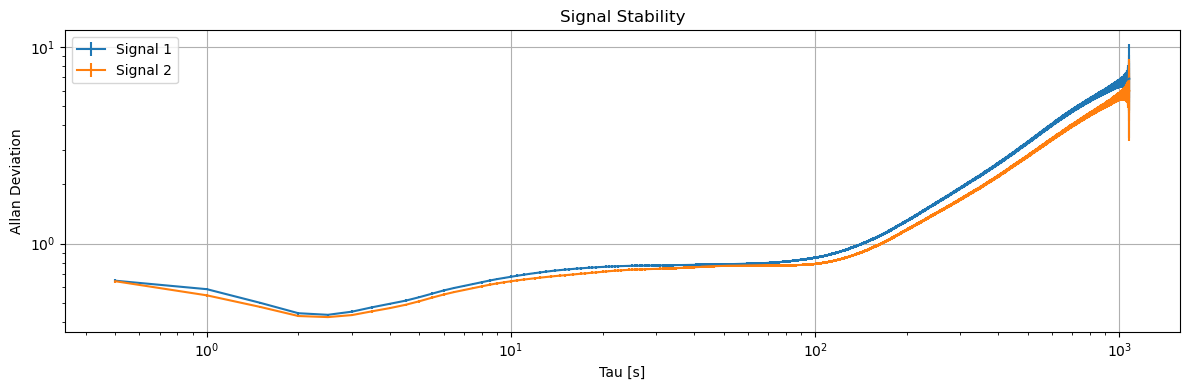

Time range: min=17527.207, max=19741.992


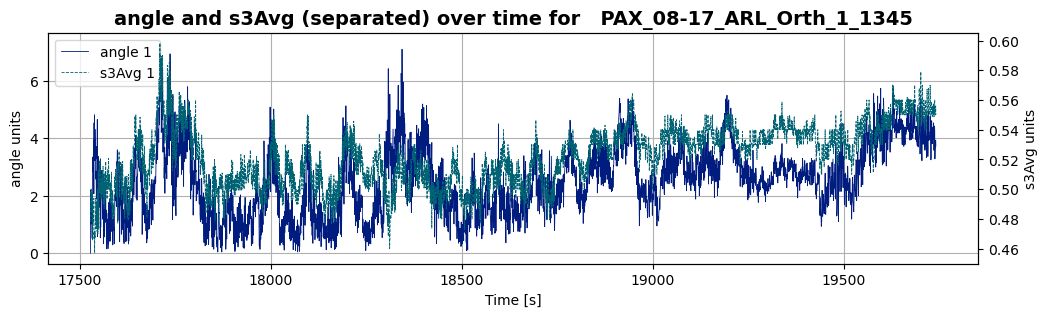

Number of taus used for signal 1: 1377
Number of taus used for signal 2: 1377


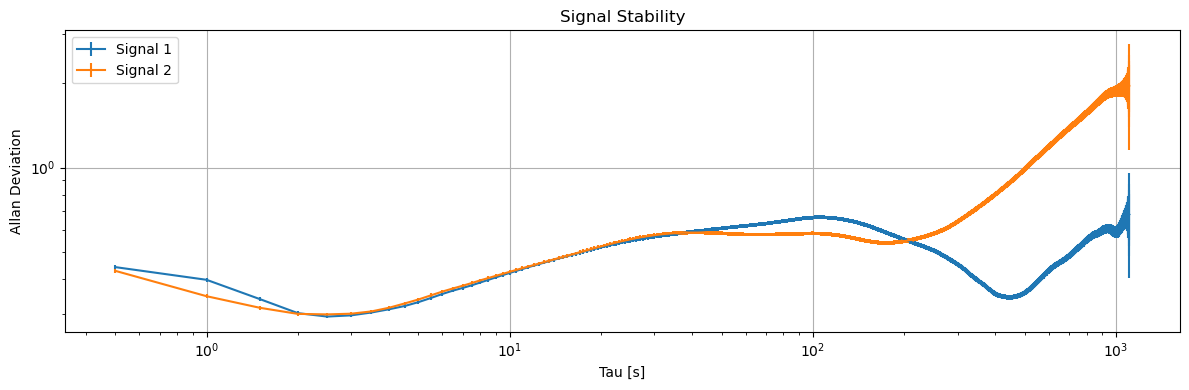

Time range: min=19742.002, max=21971.336


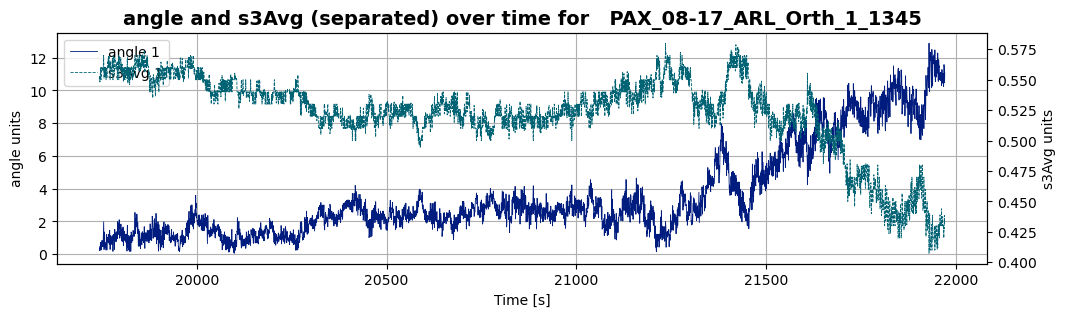

Number of taus used for signal 1: 1380
Number of taus used for signal 2: 1380


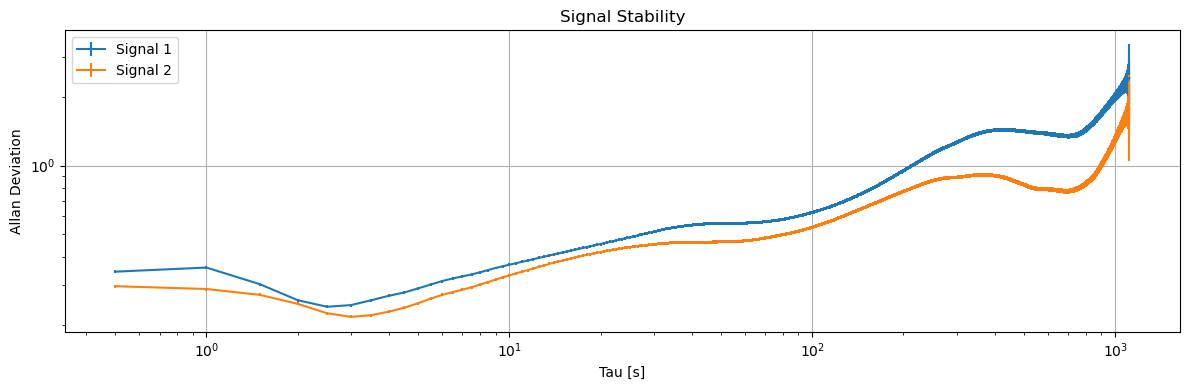

Time range: min=21971.348, max=24185.057


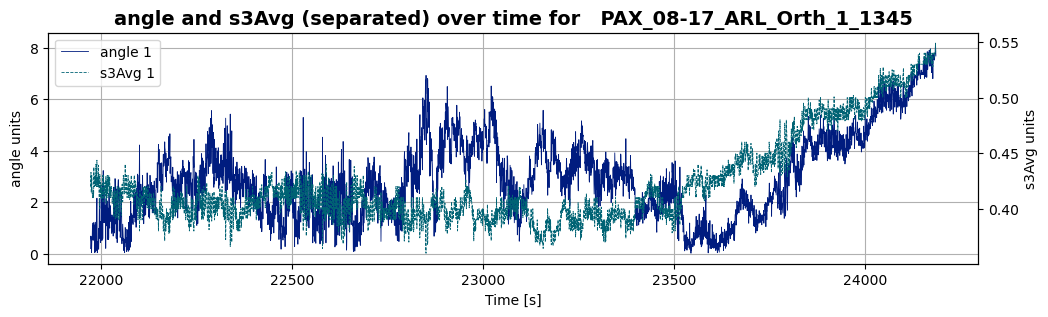

Number of taus used for signal 1: 1376
Number of taus used for signal 2: 1376


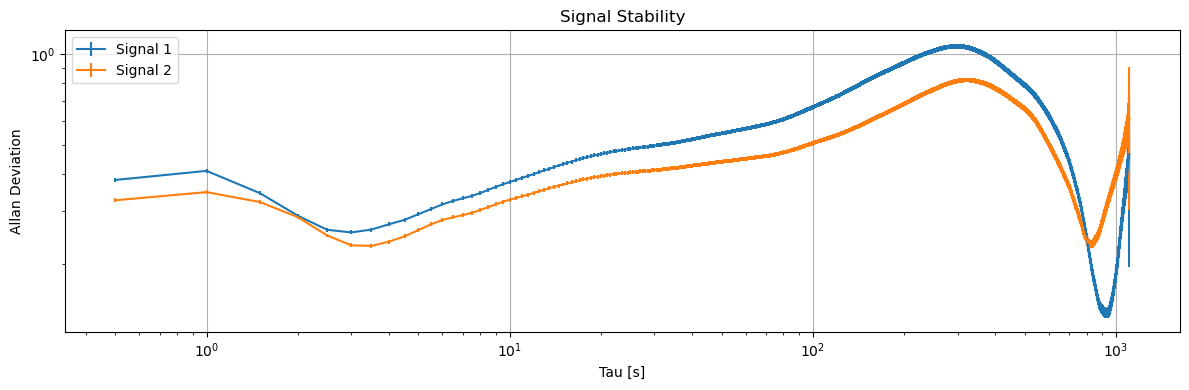

Time range: min=24185.077, max=26432.45


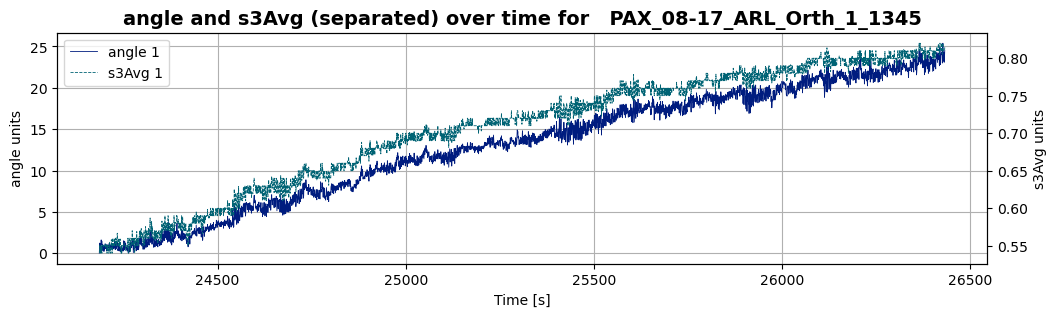

Number of taus used for signal 1: 1384
Number of taus used for signal 2: 1384


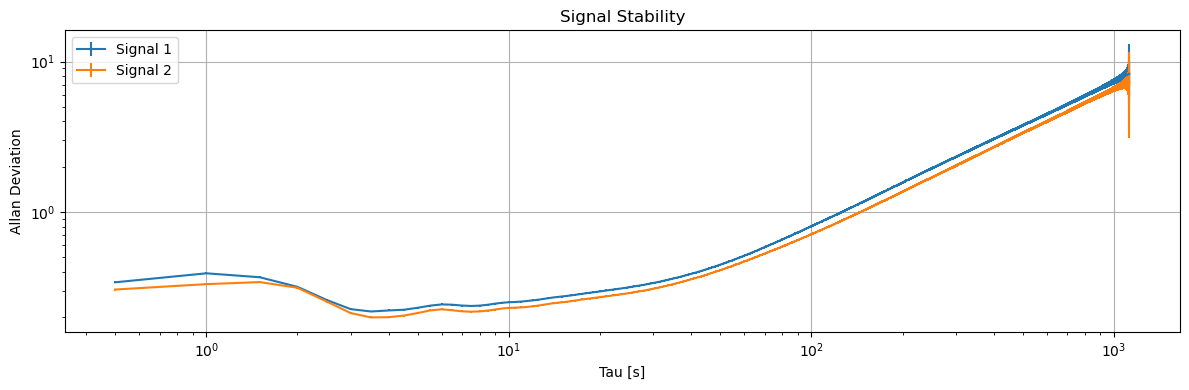

Time range: min=26432.46, max=28645.968


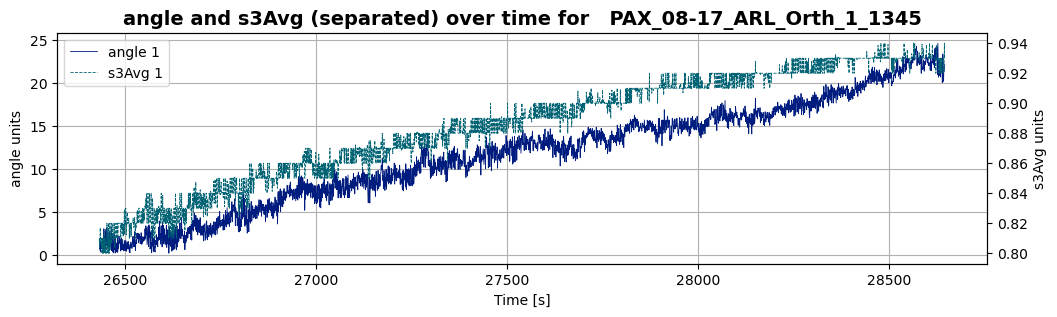

Number of taus used for signal 1: 1376
Number of taus used for signal 2: 1376


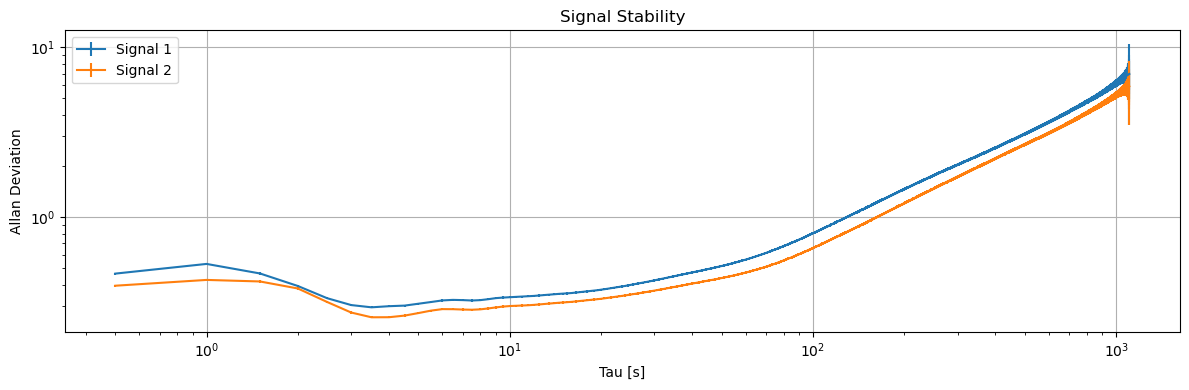

Time range: min=28645.988, max=30860.099


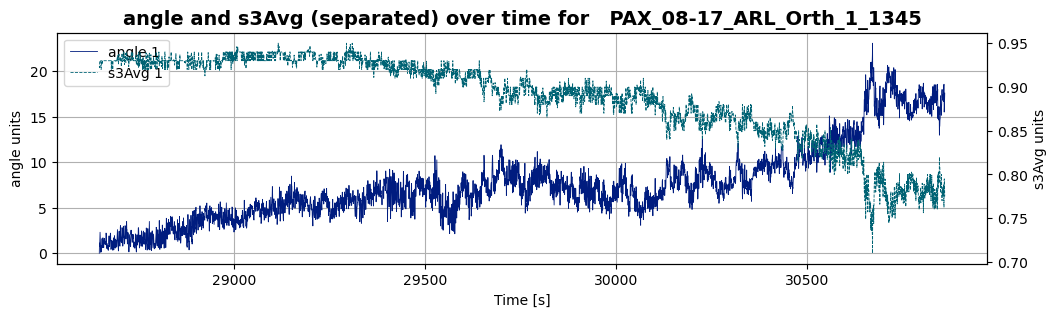

Number of taus used for signal 1: 1376
Number of taus used for signal 2: 1376


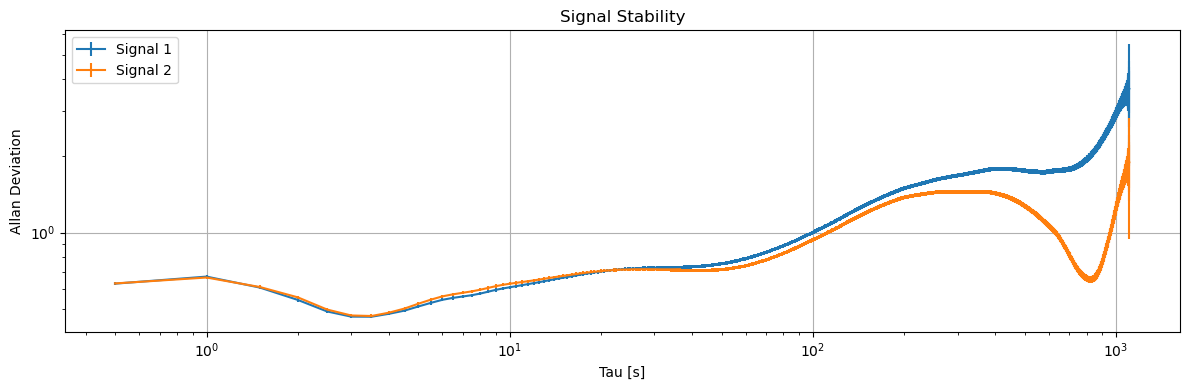

Time range: min=30860.109, max=33070.309


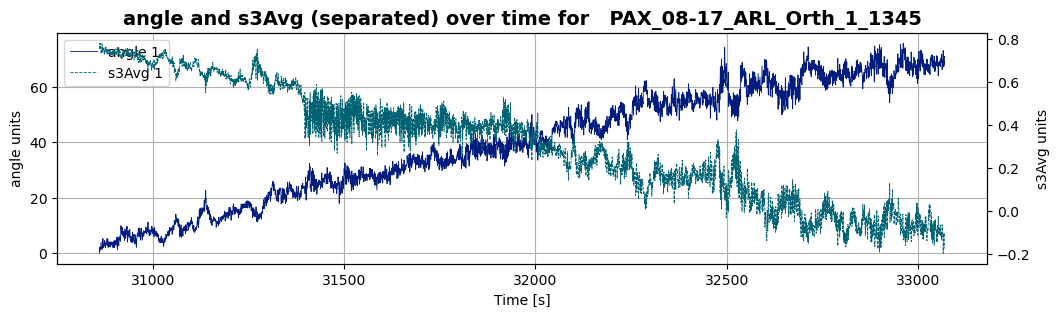

Number of taus used for signal 1: 1376
Number of taus used for signal 2: 1376


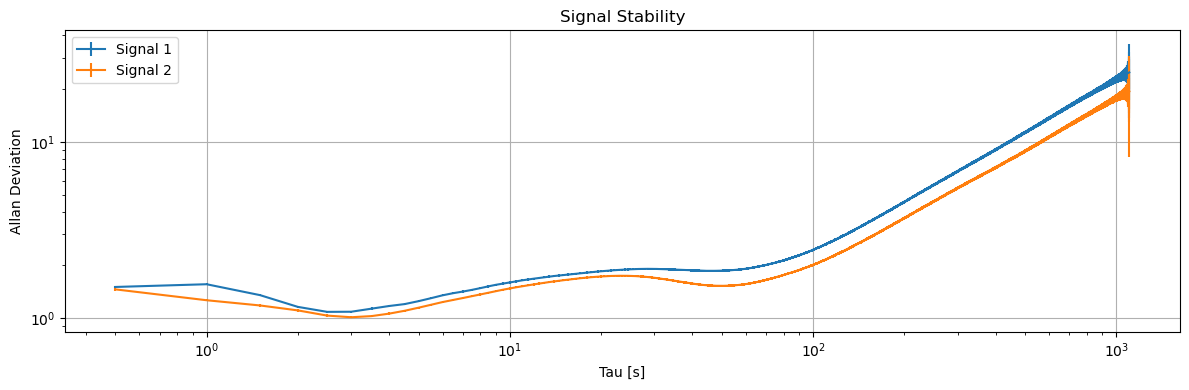

Time range: min=33070.326, max=35270.726


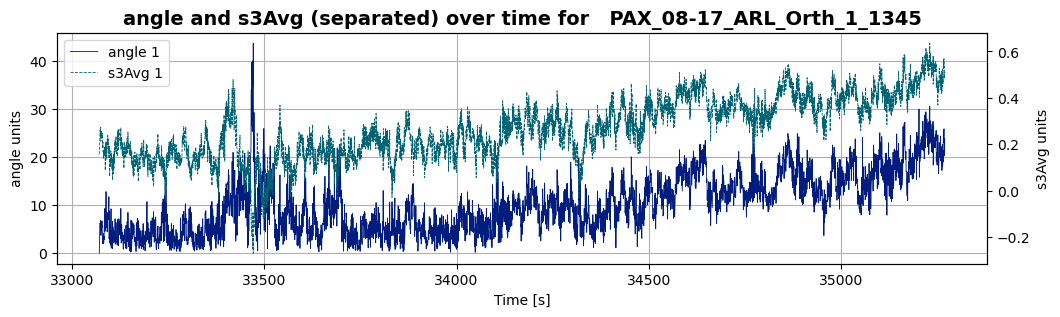

Number of taus used for signal 1: 1374
Number of taus used for signal 2: 1374


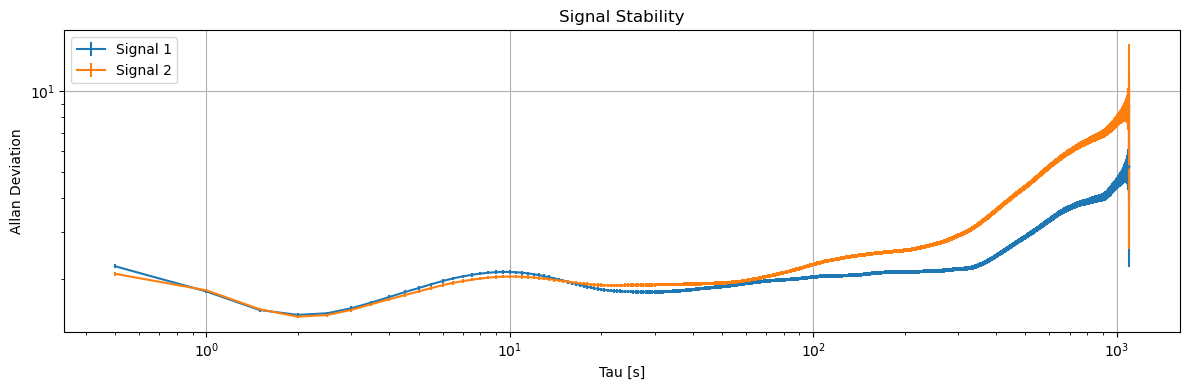

Time range: min=35270.736, max=37494.871


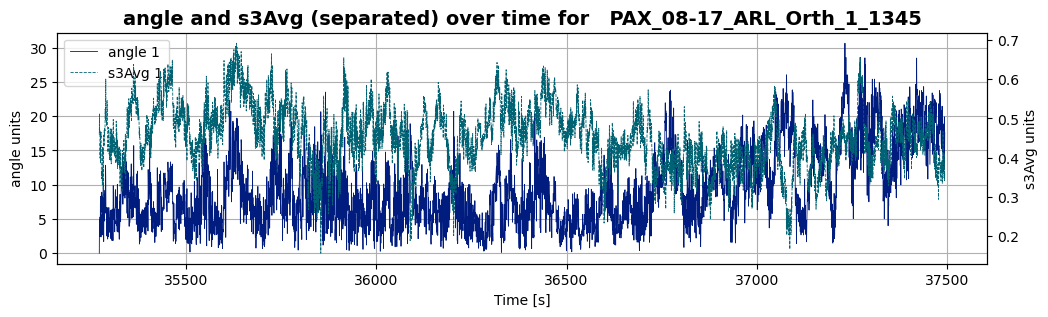

Number of taus used for signal 1: 1379
Number of taus used for signal 2: 1379


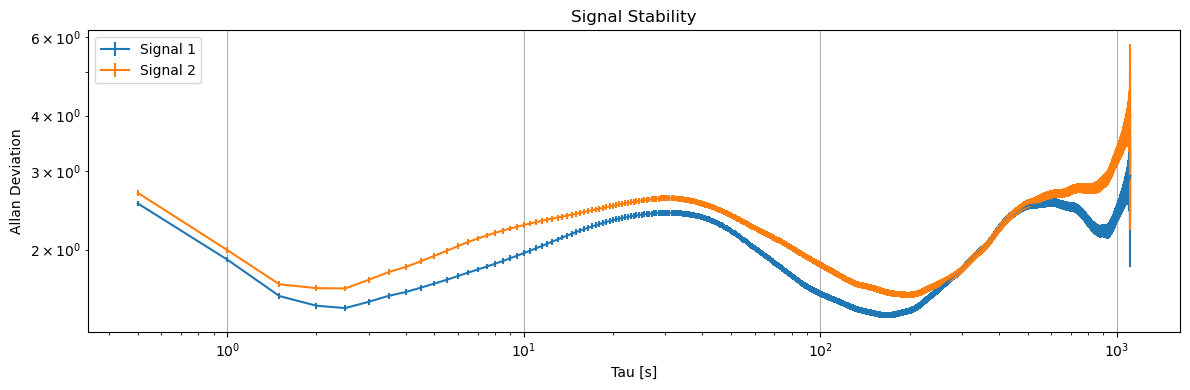

Time range: min=37494.881, max=39749.194


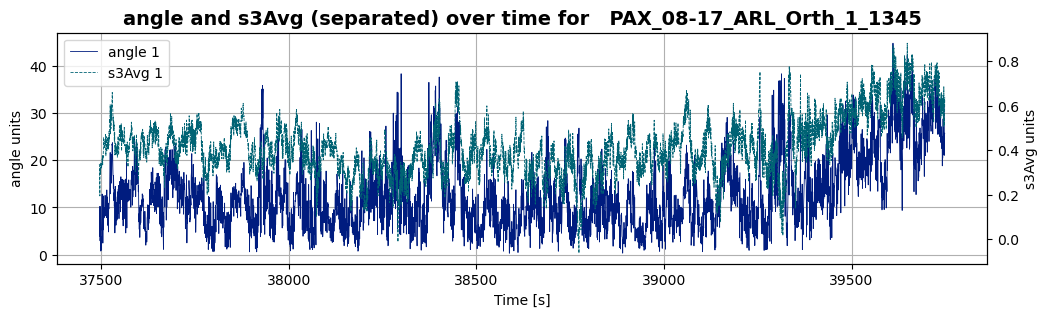

Number of taus used for signal 1: 1386
Number of taus used for signal 2: 1386


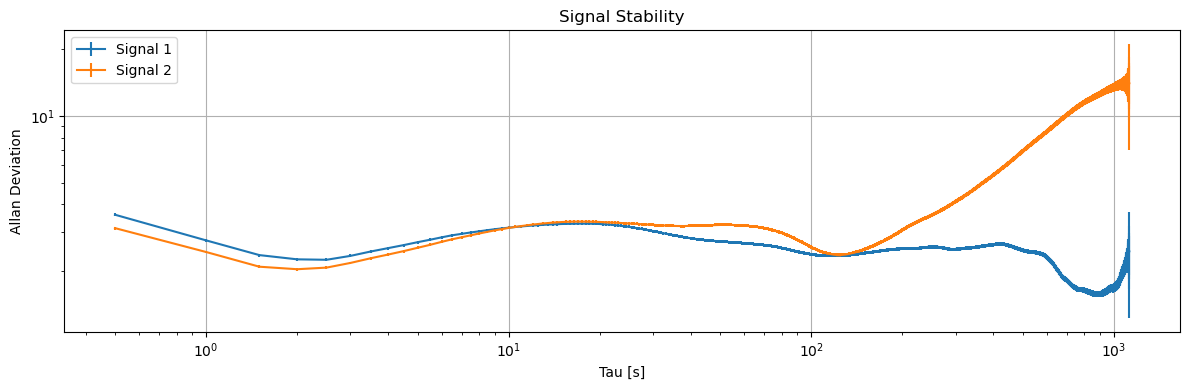

Time range: min=39749.214, max=42011.211


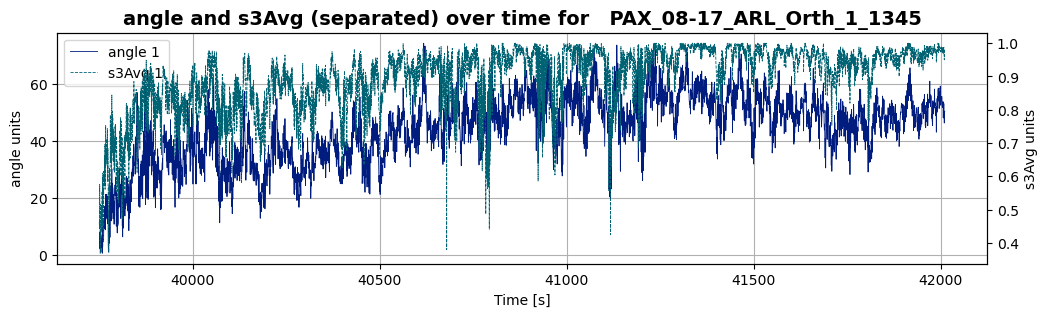

Number of taus used for signal 1: 1387
Number of taus used for signal 2: 1387


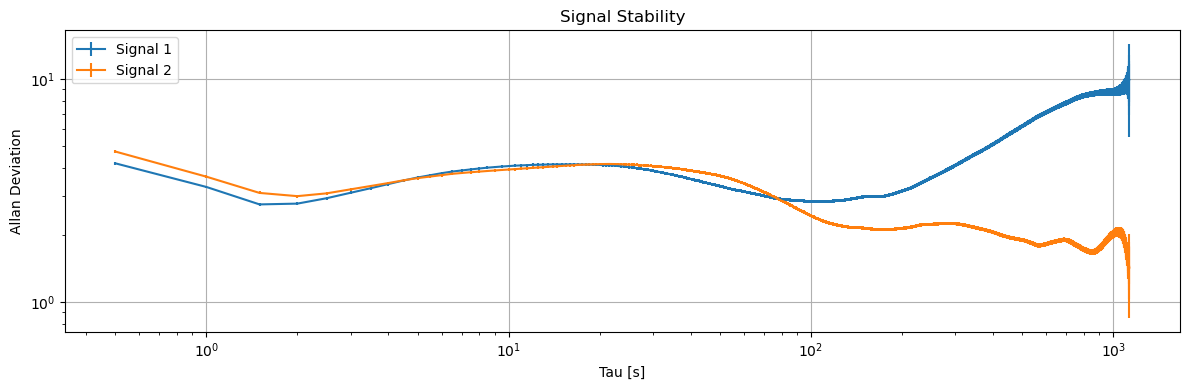

Time range: min=42011.221, max=44268.004


IndexError: single positional indexer is out-of-bounds

In [58]:
filepath_ARL_1_1345='Datasets/Whole_setup/08-17/PAX_08-17_ARL_Orth_1_1345.csv'
adev_params_arr = []
r=0.05
while r+0.05 <= 1.01:
    set_range = (r,r+0.05)
    ds_temp = SwitchSet(filepath_ARL_1_1345,set_range=set_range)
    ds_temp.find_switches(print_process=False)
    ds_temp.average_data(print_process=False)
    ds_temp.calc_transfer(input_stokes='first')
    ds_temp.plot_separated(plot_param='angle', plot_param_2='s3Avg', plot_signal=1)
    taus2_1,ad_1,ade_1,ns_1,taus2_2,ad_2,ade_2,ns_2 = ds_temp.adev(plot_param='angle', plot_adev=True)
    label = ds_temp.title+" {}".format(set_range)
    adev_params_arr.append((taus2_1,ad_1,ade_1,ns_1,label+'_Signal 1'))
    adev_params_arr.append((taus2_2,ad_2,ade_2,ns_2,label+'_Signal 2'))
    r += 0.05

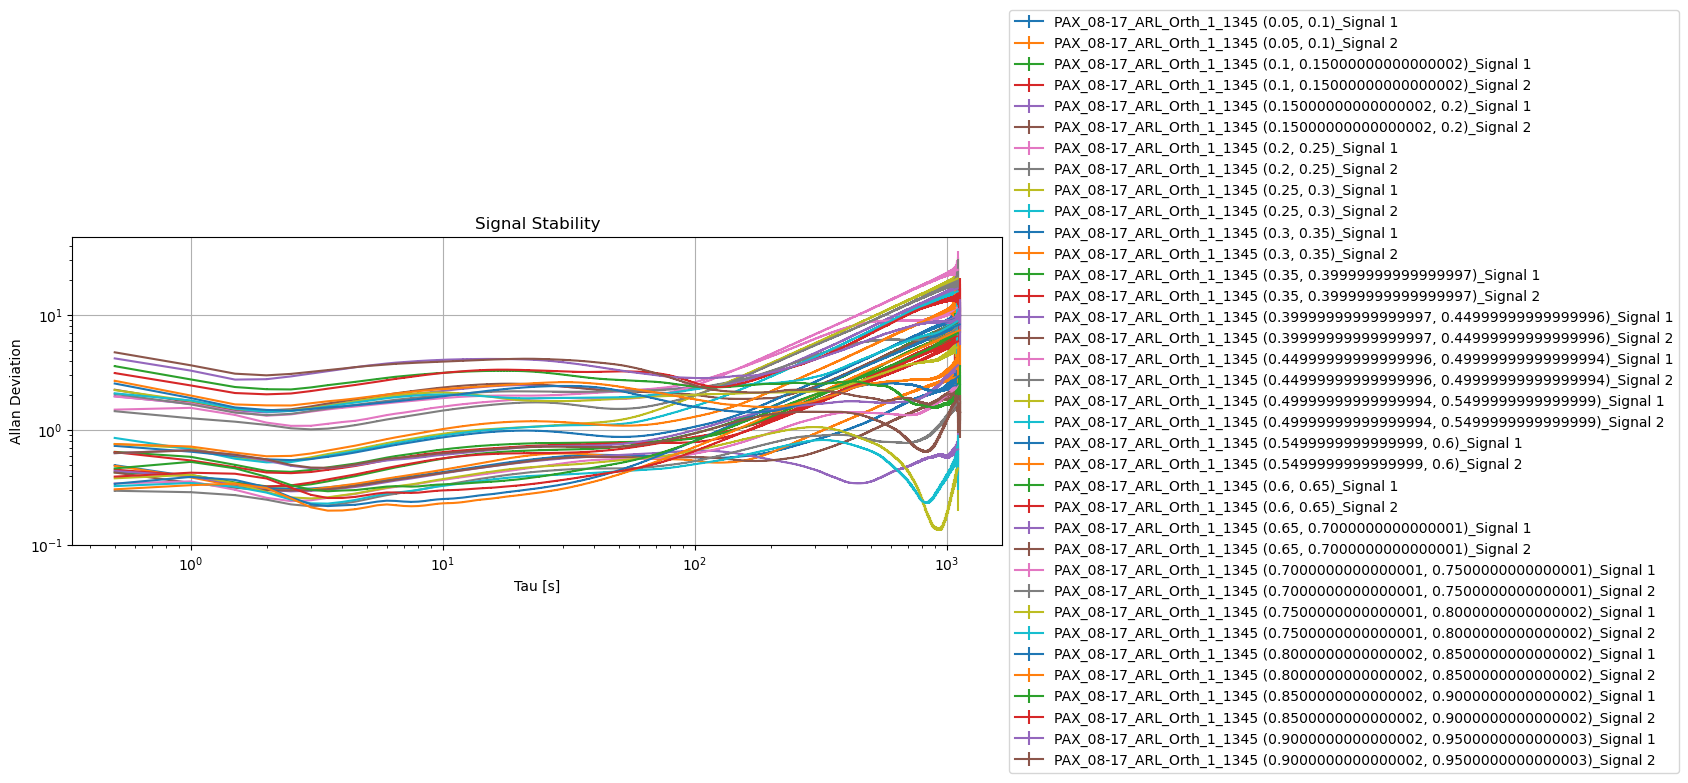

In [59]:
StationarySet.plot_adev(adev_params_arr)